------------------------------------------------------------------------------------------

<img src="https://camscanada.com/img/CarGurus.png" width=600>

------------------------------------------------------------------------------------------

## **CAPSTONE PROJECT**

## **Vehicle Price Prediction Part 1**


**By: Robby Khoutsaysana**

------------------------------------------------------------------------------------------

### **Introduction**

Hello, my name is Robby Khoutsaysana. This is my capstone project for the Data Science program at BrainStation. This project highlights some of the skills and knowledge I have learned throughout the program. I chose to do this project because I have a passion for cars and I am interested in the world of business. I hope you enjoy my project and I look forward to your feedback.

### **Buisness Problem Statement**

In the world of business, there are many decisions that need to be made. One of the most important decisions is the pricing of a product. The price of a product is a key factor in the success of a business. If the price is too high, the product will not sell. If the price is too low, the business will not make a profit.
 
The goal of this project is to develop a machine learning model that will predict the price of a vehicle. The results of the model and the conclusions drawn from the data will be used to inform the decision making process of a company.

### **About the Data**

This data was obtained using web scraping techniques on <a href="https://www.cargurus.com/">https://www.cargurus.com/</a>. This data is for academic, research and individual experimentation only and is not intended for commercial purposes. This dataset contains 3 million new and used vehicle listings in the United States. The data set can be downloaded on <a href="https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset">https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset.</a>

To get a better understanding of the dataset, a data dictionary was created. This data dictionary can be downloaded/reviewed <a href="https://drive.google.com/file/d/177p54r5GarfVBSzNn3jFTkHS1N-yXNwx/view?usp=share_link">here.</a>

### **Target Variable**

In this project, the target variable will be the price of the vehicle. The price of the vehicle will be the value that we are trying to predict.

Target | Description | Data Type | Analysis Type
---|----------------------------|----------| ----------------
`price` | The price of the vehicle | `int64` | Regression

Since the target variable is continuous, this will be a regression problem. 

We will need to explore the data to determine which machine learning algorithm will be the best fit for this problem.

### **Questions of interest**

Throughout this project, the following questions will help us understand the data and the results of the model:

1. Why is the price of a vehicle different from other vehicles?
2. What features are important to predicting the price of a vehicle?
3. What is the relationship between the price of a vehicle and other features? 

------------------------------------------------------------------------------------------

### **Importing the data and libraries**

Let's begin by importing a few of the libraries that we will need for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

Next, we will read in the data and preview the first 5 rows of the data.

`Note: The vin number is a unique identifier for each vehicle. We will use this column as the index for the dataframe.`

In [5]:
# importing the dataset
df = pd.read_csv('capstone_dataset.csv', index_col='vin')

# sanity check
df.head()

C:\Users\robby\AppData\Local\Temp\ipykernel_13908\2753195485.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('capstone_dataset.csv', index_col='vin')


,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.000,NaN,1233,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


The data has imported with some mixed data types. We will need to convert the data types as we explore the data.

In [6]:
# checking the shape of the dataset
shape = df.shape

print(f"The shape of the dataframe is {shape[0]} rows and {shape[1]} columns")

The shape of the dataframe is 3000040 rows and 65 columns


As we can see, there are 3,000,040 rows and 65 columns in the dataset.

Let's look at the data types of the columns.

In [7]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000040 entries, ZACNJABB5KPJ92081 to JN8AT2MT1HW400805
Data columns (total 65 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   back_legroom             object 
 1   bed                      object 
 2   bed_height               object 
 3   bed_length               object 
 4   body_type                object 
 5   cabin                    object 
 6   city                     object 
 7   city_fuel_economy        float64
 8   combine_fuel_economy     float64
 9   daysonmarket             int64  
 10  dealer_zip               object 
 11  description              object 
 12  engine_cylinders         object 
 13  engine_displacement      float64
 14  engine_type              object 
 15  exterior_color           object 
 16  fleet                    object 
 17  frame_damaged            object 
 18  franchise_dealer         bool   
 19  franchise_make           object 
 20  front_legroom            

It looks like there are a few columns that have the wrong data type. We will need to convert these columns to the correct data type as we explore the data.

------------------------------------------------------------------------------------------

## **Data Cleaning & Data Wrangling**

We will now begin the data cleaning process. This process will involve the following steps:
 
* Dropping duplicate rows 
* checking for multicollinearity and determining how to handle it
* Filling in missing values/NaN values 
* Exploring outliers and determining how to handle them 
* Fixing the values and data types of the columns
* Feature Engineering (creating new features from existing features)
* Pre-processing the data for the model (scaling, encoding, etc.)
* Exploring the data to gain insights and answer the questions of interest
* Dropping irrelevant columns for the model
* Saving the cleaned data for the next part of the project

---

## **Duplicate Rows**

Let's begin by checking for duplicate rows using the VIN number. If there are duplicate rows, we will drop them.

In [8]:
# checking for duplicate rows
duplucate_rows = df.duplicated().sum()

print(f"The number of duplicate rows are {duplucate_rows}.")

The number of duplicate rows are 40.


This is a low amount of duplicate rows. Lets see how much this represents the dataset.

In [9]:
# dividing the duplicate rows by the total rows to get the percentage
percentage = duplucate_rows/df.shape[0]*100

print(f"The percentage of duplicate rows is {percentage}%.")

The percentage of duplicate rows is 0.0013333155557925895%.


As expected, this is a very low amount of duplicate rows. Let's take a closer look to see if these are actual duplicates or if they are different rows with the same values.

In [10]:
# setting the duplicated index
duplicate_index = df.duplicated(keep=False)

# calling the duplicated index in a dataframe
df.loc[duplicate_index, :].sort_index()

,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,
1C3CCCBG4FN686074,37.6 in,NaN,NaN,NaN,Sedan,NaN,Deer Park,19.000,NaN,530,...,A,Automatic,t53887,S Sedan FWD,NaN,FWD,Front-Wheel Drive,108.9 in,73.6 in,2015
1C3CCCBG4FN686074,37.6 in,NaN,NaN,NaN,Sedan,NaN,Deer Park,19.000,NaN,530,...,A,Automatic,t53887,S Sedan FWD,NaN,FWD,Front-Wheel Drive,108.9 in,73.6 in,2015
1C6RR7FT5ES405345,34.7 in,NaN,--,76.3 in,Pickup Truck,NaN,Bonners Ferry,NaN,NaN,49,...,NaN,NaN,t52613,Tradesman Quad Cab 4WD,NaN,4WD,Four-Wheel Drive,140.5 in,79.4 in,2014
1C6RR7FT5ES405345,34.7 in,NaN,--,76.3 in,Pickup Truck,NaN,Bonners Ferry,NaN,NaN,49,...,NaN,NaN,t52613,Tradesman Quad Cab 4WD,NaN,4WD,Four-Wheel Drive,140.5 in,79.4 in,2014
1FA6P8TH0J5179933,29 in,NaN,NaN,NaN,Coupe,NaN,Groveport,21.000,NaN,7,...,A,Automatic,t73250,EcoBoost Coupe RWD,NaN,RWD,Rear-Wheel Drive,107.1 in,81.9 in,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7FART6H88LE013181,40.4 in,NaN,NaN,NaN,SUV / Crossover,NaN,Westerville,40.000,NaN,28,...,CVT,Continuously Variable Transmission,t92182,EX-L AWD,NaN,AWD,All-Wheel Drive,104.7 in,73 in,2020
JTEBU5JR5K5687002,32.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Airway Heights,17.000,NaN,20,...,A,Automatic,t80268,SR5 Premium 4WD,NaN,4WD,Four-Wheel Drive,109.8 in,75.8 in,2019
JTEBU5JR5K5687002,32.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Airway Heights,17.000,NaN,20,...,A,Automatic,t80268,SR5 Premium 4WD,NaN,4WD,Four-Wheel Drive,109.8 in,75.8 in,2019


The results show that there are no differences between the duplicate rows. This means that we can safely drop these rows.

In [11]:
# making a copy with the duplicated rows dropped
df2 = df.drop_duplicates().copy()

# checking for duplicate rows in the new dataframe
dup = df2.duplicated().sum()

print(f"The number of duplicate rows are {dup}.")

The number of duplicate rows are 0.


In [12]:
# sanity check
df2.shape

(3000000, 65)

Great! Now that we have removed the duplicate rows, let's look at the missing values.

---

## **Null Values**

Now that we have removed the duplicate rows, let's explore the null values.

In [13]:
# checking for the total amount of null values
df2.isnull().sum()

back_legroom             159266
bed                     2980432
bed_height              2570909
bed_length              2570909
body_type                 13542
                         ...   
wheel_system             146730
wheel_system_display     146730
wheelbase                159266
width                    159266
year                          0
Length: 65, dtype: int64

This is a very large amount of missing values. Let's explore this as a percentage.

In [14]:
# checking for the total amount of null values as a percentage.
df2.isna().sum()/df2.shape[0]*100

back_legroom            5.309
bed                    99.348
bed_height             85.697
bed_length             85.697
body_type               0.451
                        ...  
wheel_system            4.891
wheel_system_display    4.891
wheelbase               5.309
width                   5.309
year                    0.000
Length: 65, dtype: float64

There are several columns that have an exceptionally large amount of null values. This means that these columns will not be useful for our analysis because of the sheer amount of missing values.

Let's set a threshold of 50% and drop any columns above that threshold. This will allow us to remove the columns that have a large amount of missing values that can skew our analysis.

In [17]:
# Delete columns containing more than 50% null values
percentage = 50
min_count =  int(((100-percentage)/100)*df2.shape[0] + 1)
cars_df = df2.dropna(axis=1, thresh=min_count)

print(f"The columns with {percentage}% or more null values are: {df2.columns[df2.isna().sum()/df2.shape[0]*100 > percentage]}")
print(f"The new shape of the dataframe is {cars_df.shape[0]} rows and {cars_df.shape[1]} columns.")

The columns with 50% or more null values are: Index(['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy',
       'is_certified', 'is_cpo', 'is_oemcpo', 'owner_count',
       'vehicle_damage_category'],
      dtype='object')
The new shape of the dataframe is 3000000 rows and 55 columns.


The results show that the following columns have been dropped:
* `bed`
* `bed_height`
* `bed_length`
* `cabin`
* `combine_fuel_economy`
* `is_certified`
* `is_cpo`
* `is_oemcpo`
* `owner_count`
* `vehicle_damage_category`

Lets filter only the columns with null values.

In [18]:
# checking how many null values are in the dataframe that are over 0%
percentage = cars_df.isna().sum()/cars_df.shape[0]*100

pd.DataFrame(percentage[percentage > 0])

,0
back_legroom,5.309
body_type,0.451
city_fuel_economy,16.376
description,2.597
engine_cylinders,3.353
engine_displacement,5.746
engine_type,3.353
exterior_color,0.001
fleet,47.553
frame_damaged,47.553


This is much better. Now we can focus on each column individually to determine how to handle the missing values.

---

Lets create a copy of the dataframe here so that we can always go back to the original data if needed.

In [19]:
# creating a copy of the dataframe
cars_df2 = cars_df.copy()

---

### **back_legroom**

The back legroom is the amount of space available in the back of the vehicle.

Let's see how many null values we have in this column.

In [20]:
# checking for the total amount of null values as a percentage.
percentage = cars_df2['back_legroom'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the back_legroom column is {percentage.round(2)}%.")

The amount of null values in the back_legroom column is 5.31%.


We can see that there is ~5% of null values in this column. Lets look into this column further.

In [21]:
# checking the value counts of the column.
cars_df2['back_legroom'].value_counts()

38.3 in    113890
43.6 in    102489
37.4 in     87363
--          83458
35.7 in     77160
            ...  
47.1 in         1
27.9 in         1
23.5 in         1
25.7 in         1
52.8 in         1
Name: back_legroom, Length: 219, dtype: int64

In [22]:
# checking the unique values of the column.
cars_df2['back_legroom'].unique()

array(['35.1 in', '38.1 in', '35.4 in', '37.6 in', '37.1 in', '33.8 in',
       '--', '35 in', '39.6 in', '35.7 in', '27.3 in', '38.4 in',
       '36.8 in', '38.6 in', '39.4 in', nan, '34.1 in', '39.5 in',
       '36.2 in', '39.9 in', '37 in', '37.2 in', '38.3 in', '27.1 in',
       '40.1 in', '34.6 in', '35.3 in', '37.4 in', '38 in', '39.7 in',
       '35.6 in', '42.6 in', '33.7 in', '39 in', '38.2 in', '33 in',
       '37.9 in', '29.9 in', '37.8 in', '36.1 in', '34.2 in', '37.3 in',
       '40.3 in', '35.8 in', '39.3 in', '38.7 in', '39.1 in', '43.6 in',
       '41.7 in', '36.3 in', '45.2 in', '30.6 in', '43.4 in', '36.6 in',
       '33.1 in', '35.5 in', '39.8 in', '35.2 in', '40.9 in', '38.5 in',
       '36.5 in', '35.9 in', '44.3 in', '34.3 in', '33.4 in', '32.2 in',
       '33.3 in', '34.8 in', '30.8 in', '31.4 in', '37.7 in', '31.7 in',
       '36.4 in', '32.6 in', '40.4 in', '34.7 in', '40 in', '41.9 in',
       '30.5 in', '30.3 in', '33.5 in', '33.9 in', '29.2 in', '38.8 in',
 

We can already see that this column will need to be cleaned. Let's first remove the unit of measurement from the data. Then convert any special characters into a null value so that we can easily fill in the null values with the average value.

In [23]:
# splitting the back_legroom column and returning only the numeric values.
cars_df2['back_legroom'] = cars_df2['back_legroom'].str.split(' ').str[0]

# replacing the "--" with NaN values
cars_df2['back_legroom'].replace('--', np.nan , inplace=True)

# converting the back_legroom column to a float
cars_df2['back_legroom'] = pd.to_numeric(cars_df2['back_legroom'], downcast='float')

Now that the column is cleaned, lets first get a visual on the distribution of the data.

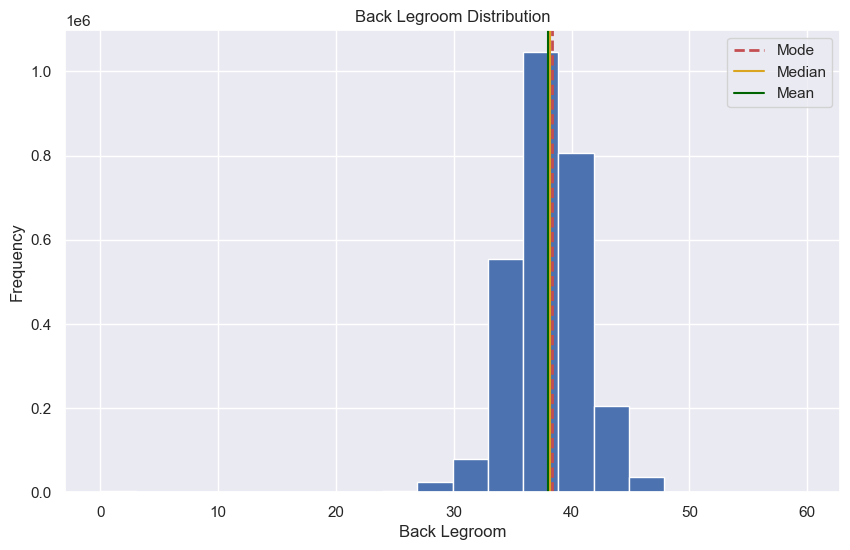

In [24]:
# plotting the distribution of the back_legroom column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['back_legroom'], bins=20)
plt.title('Back Legroom Distribution')
# Add the mode
plt.axvline(cars_df2['back_legroom'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['back_legroom'].median(), color='goldenrod', label='Median')
# Add the mean
plt.axvline(cars_df2['back_legroom'].mean(), color='darkgreen', label='Mean')
plt.legend()
plt.xlabel('Back Legroom')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Checking the mean of the back_legroom column
cars_df2['back_legroom'].mean()

37.963577

The results show that most of the vehicles have a back legroom of ~38 inches. We can also see that there are a few outliers. Let's take a closer look at these outliers with zero back legroom. This could be because they are vehicles that do not have a back seat. Let's take a look at the body type of these vehicles, to see if this is the case.

In [26]:
# checking for outliers in the back_legroom column
cars_df2.loc[:,['body_type','maximum_seating']][cars_df2['back_legroom'] < 10].value_counts()

body_type        maximum_seating
Pickup Truck     3 seats            1890
Sedan            5 seats              41
Pickup Truck     5 seats              35
SUV / Crossover  4 seats              15
                 2 seats               4
Minivan          2 seats               1
dtype: int64

As expected, the outliers are the vehicles with no back seats and therefore no back legroom, such as a truck or a sedan. But there are also a few vehicles that have a back seat, but no back legroom. Let's take a look at these vehicles.

In [27]:
# checking for outliers in the back_legroom column that are not pickup trucks
cars_df2.loc[:,['body_type','maximum_seating','back_legroom','make_name',
               'model_name']][(cars_df2['back_legroom'] < 10) & (
                   cars_df2['body_type'] != 'Pickup Truck')]

,body_type,maximum_seating,back_legroom,make_name,model_name
vin,,,,,
1J4FA29123P319338,SUV / Crossover,4 seats,0.000,Jeep,Wrangler
JF1GE60669H503687,Sedan,5 seats,3.500,Subaru,Impreza
1J4FA29124P725315,SUV / Crossover,4 seats,0.000,Jeep,Wrangler
JF1GE60639H500844,Sedan,5 seats,3.500,Subaru,Impreza
WDDGF77X99F215188,Sedan,5 seats,0.000,Mercedes-Benz,C-Class
...,...,...,...,...,...
WDDGF77X99F326372,Sedan,5 seats,0.000,Mercedes-Benz,C-Class
JF1GE60649H521086,Sedan,5 seats,3.500,Subaru,Impreza
JF1GE60679H510177,Sedan,5 seats,3.500,Subaru,Impreza


It looks like these vehicles have a back seat, but the back legroom is not listed. This is because the back legroom is not a standard feature for these vehicles. We can fill in the null values with the average back legroom for the body type of the vehicle. 

In [28]:
# filling the null values with the median value
cars_df2['back_legroom'].fillna(cars_df2['back_legroom'].mean(), inplace=True)
 
# checking for the total amount of null values as a percentage.
percentage = cars_df2['back_legroom'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the back_legroom column is {percentage.round(2)}%.")

The amount of null values in the back_legroom column is 0.0%.


---

### **body_type**

The body type is the type of body the vehicle has. This can be a sedan, SUV, truck, etc. This is a categorical variable and will need to be encoded.

In [29]:
# checking for the total amount of null values as a percentage.
percentage = cars_df2['body_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the body_type column are {percentage.round(2)}%.")

The amount of null values in the body_type column are 0.45%.


The size of null values is very low. Let's take a look at the data to see if we can fill in the null values.

In [30]:
# checking the body_type column for the most common body type
cars_df2['body_type'].value_counts()/cars_df2['body_type'].shape*100

SUV / Crossover   47.213
Sedan             24.734
Pickup Truck      15.820
Hatchback          2.946
Minivan            2.660
Coupe              2.387
Van                1.572
Wagon              1.350
Convertible        0.867
Name: body_type, dtype: float64

We can see that the majority of vehicles are SUV / Crossover. Let's take a look at the null rows and see what we can do with them.

In [31]:
#checking the rows of the null values in the body_type column
cars_df2.loc[:,['body_type','make_name','model_name']][cars_df2['body_type'].isna()]

,body_type,make_name,model_name
vin,,,
5XXG14J28MG001288,NaN,Kia,K5
5XXG14J2XMG006458,NaN,Kia,K5
5XXG14J28MG006443,NaN,Kia,K5
5XXG14J22MG003974,NaN,Kia,K5
5XXG64J29MG017274,NaN,Kia,K5
...,...,...,...
3MVDMABL4MM201291,NaN,Mazda,CX-30
3MVDMBCL5MM202079,NaN,Mazda,CX-30
JA4AT4AA0KZ050139,NaN,Mitsubishi,Eclipse Cross


It looks like the null vehicles are indeed SUV / Crossover. We can fill in the null values with the most common value.

In [32]:
# replacing null values with the most common body type
cars_df2['body_type'].replace(np.nan, 'SUV / Crossover', inplace=True)

# checking for nulls
result = cars_df2['body_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the body_type column are {result.round(2)}%.")

The amount of null values in the body_type column are 0.0%.


Let's get a visual representation of the body type.

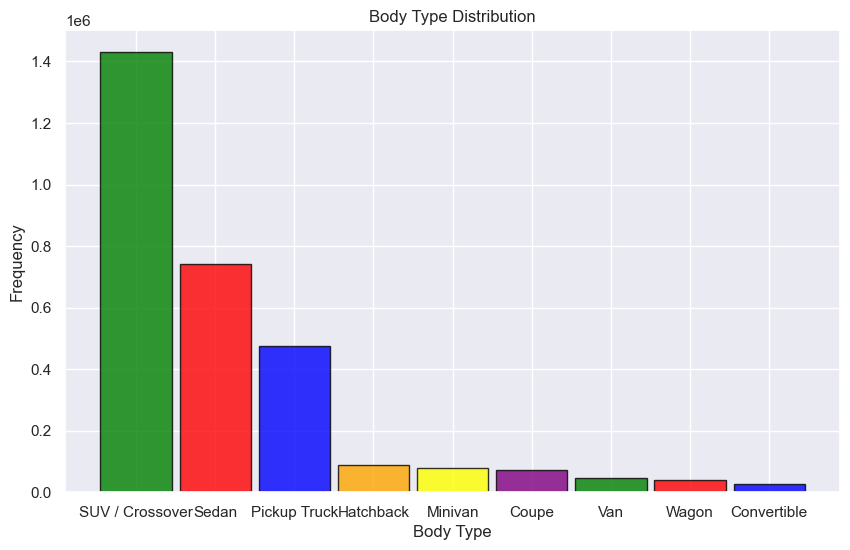

In [37]:
# plotting the distribution of the body_type column
plt.figure(figsize=(10,6))
plt.bar(cars_df2['body_type'].value_counts().index, cars_df2['body_type'].value_counts(),
        color=['green','red','blue','orange','yellow','purple'], alpha=0.8, width=0.9, edgecolor='black')
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()

The results show that the majority of vehicles are SUV / Crossover, followed by sedans, and pickup trucks. 

---

### **city_fuel_economy** 

The city fuel economy is the fuel economy of the vehicle in the city.

In [38]:
# checking for the total amount of null values as a percentage.
percentage = cars_df2['city_fuel_economy'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the city_fuel_economy column are {percentage.round(2)}%.")

The amount of null values in the city_fuel_economy column are 16.38%.


We can see that there are a lot of null values. Lets dig deeper to see if we can find something to fill in the null values with.

In [39]:
# checking for the value counts of the column.
cars_df2['city_fuel_economy'].value_counts()

19.000     198957
18.000     191820
22.000     174752
21.000     170908
20.000     169252
            ...  
78.000          6
98.000          5
93.000          3
112.000         3
7.000           2
Name: city_fuel_economy, Length: 100, dtype: int64

Since this is a continuous variable, we can fill in the null values with the average value of the column.

But before we do that, let's take a look at the data to see if there are any outliers.

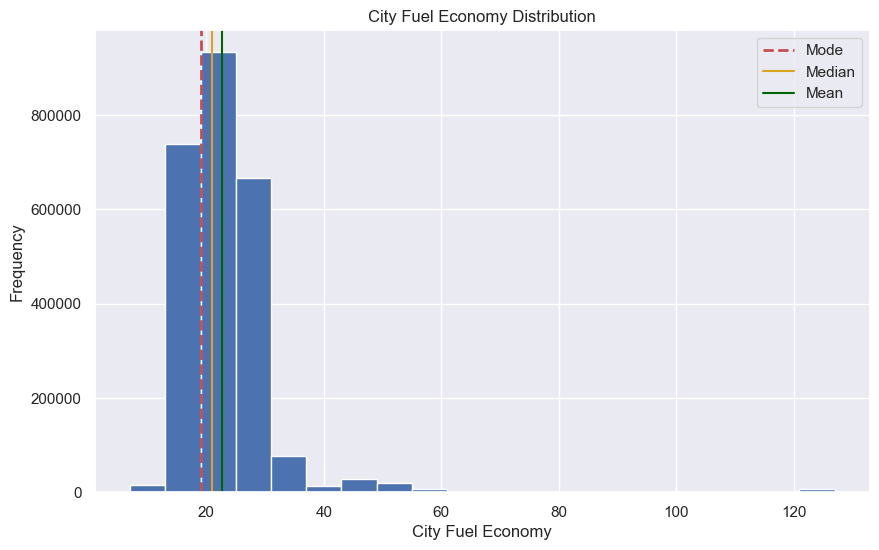

In [40]:
# plotting the distribution of the city_fuel_economy column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['city_fuel_economy'], bins=20)
plt.title('City Fuel Economy Distribution')
# Add the mode
plt.axvline(cars_df2['city_fuel_economy'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['city_fuel_economy'].median(), color='goldenrod', label='Median')
# Add the mean
plt.axvline(cars_df2['city_fuel_economy'].mean(), color='darkgreen', label='Mean')
plt.legend()
plt.xlabel('City Fuel Economy')
plt.ylabel('Frequency')
plt.show()

It looks like there is a high emphasis on the lower end of the fuel economy. This is expected because most vehicles are fuel efficient. 

Lets take a look at the outliers.

In [41]:
# checking the outliers in the city_fuel_economy column, anything over 60 mpg is an outlier
cars_df2.loc[:,['make_name','model_name','city_fuel_economy','engine_type','fuel_type']][cars_df2['city_fuel_economy'] > 60]

,make_name,model_name,city_fuel_economy,engine_type,fuel_type
vin,,,,,
WBAJB1C52KB375534,BMW,5 Series,66.000,I4,Gasoline
KMHC75LH4HU008626,Hyundai,Ioniq Electric,127.000,NaN,Electric
WBAJA9C56JB252397,BMW,5 Series,70.000,I4,Gasoline
KM8K53AG7LU067341,Hyundai,Kona Electric,127.000,NaN,Electric
KM8K53AGXLU065888,Hyundai,Kona Electric,127.000,NaN,Electric
...,...,...,...,...,...
5YJXCDE25GF024054,Tesla,Model X,90.000,NaN,Electric
WBAJB1C59JB085659,BMW,5 Series,66.000,I4,Gasoline
1G1FX6S07H4156779,Chevrolet,Bolt EV,127.000,NaN,Electric


There a few vehicles that have a very high fuel economy even though they are small engines and electric vehicles. This is likely due to the fact that these vehicles are poorly maintained. We can fill in the null values with the average fuel economy for the body type of the vehicle.

In [42]:
# replacing null values with the mean of the column
cars_df2['city_fuel_economy'].replace(np.nan, cars_df2['city_fuel_economy'].mean(), inplace=True)

# Null check
result = cars_df2['city_fuel_economy'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the city_fuel_economy column are {result.round(2)}%.")

The amount of null values in the city_fuel_economy column are 0.0%.


---

### **highway_fuel_economy**

The highway fuel economy is the fuel economy of the vehicle on the highway.

In [43]:
# checking how many null values are in the column
percentage = cars_df2['highway_fuel_economy'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the highway_fuel_economy column are {percentage.round(2)}%.")

The amount of null values in the highway_fuel_economy column are 16.38%.


This is a high amount of null values. Lets take a closer look.

In [44]:
# checking the value counts of the column.
cars_df2['highway_fuel_economy'].value_counts()/cars_df2.shape[0]*100

25.000    5.452
27.000    5.441
28.000    5.345
30.000    5.237
22.000    4.949
           ... 
10.000    0.000
91.000    0.000
83.000    0.000
56.000    0.000
120.000   0.000
Name: highway_fuel_economy, Length: 99, dtype: float64

This column is numeric, so we can replace the null values with the mean value of the column. But lets take a look at the average value of the column.

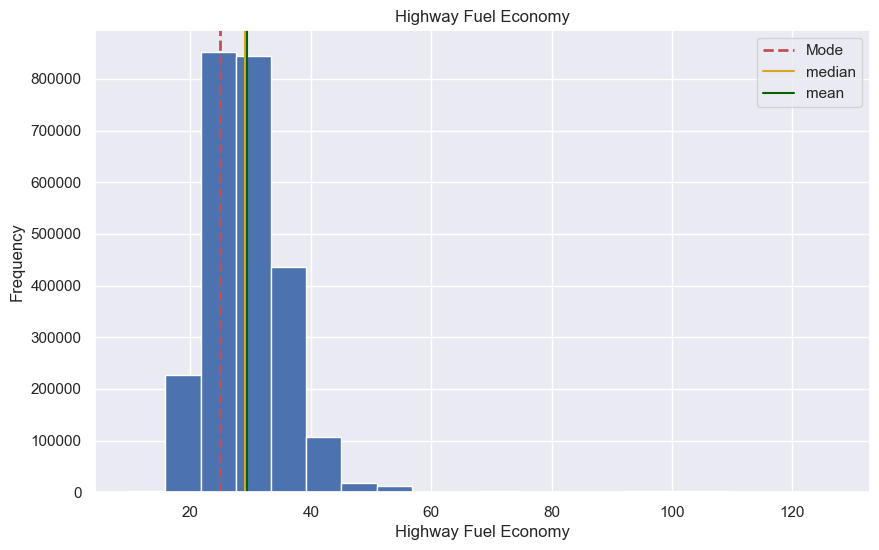

In [45]:
plt.figure(figsize=(10,6))
plt.hist(cars_df2['highway_fuel_economy'], bins=20)
plt.title('Highway Fuel Economy')
# Add the mode
plt.axvline(cars_df2['highway_fuel_economy'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['highway_fuel_economy'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['highway_fuel_economy'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Highway Fuel Economy')
plt.ylabel('Frequency')
plt.show()

Looking at the graph, it looks like the highway fuel economy of the vehicles fall within a range of approximately 20 to 30 miles per gallon. Filling in the null values with the mean value of the column is the best option.

In [46]:
# filling the null values with the mean of the column
cars_df2['highway_fuel_economy'].fillna(cars_df2['highway_fuel_economy'].mean(), inplace=True)

# checking the result
result = cars_df2['highway_fuel_economy'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the highway_fuel_economy column are {result.round(2)}%.")

The amount of null values in the highway_fuel_economy column are 0.0%.


Now that we have cleaned the highway fuel economy column, let's combine this column with the city fuel economy column to create a new column that will be more useful for our analysis.

In [47]:
# combining the city and highway fuel economy columns into a combined fuel economy column
cars_df2['combined_fuel_economy'] = (cars_df2['city_fuel_economy'] + cars_df2['highway_fuel_economy'])/2 

# dropping the city and highway fuel economy columns
cars_df2.drop(['city_fuel_economy','highway_fuel_economy'], axis=1, inplace=True)

# checking the head of the dataframe
cars_df2.head()

,back_legroom,body_type,city,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,...,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.100,SUV / Crossover,Bayamon,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.000,I4,Solar Yellow,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019,26.083
SALCJ2FX1LH858117,38.100,SUV / Crossover,San Juan,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.000,I4,Narvik Black,...,A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.083
JF1VA2M67G9829723,35.400,Sedan,Guaynabo,1233,969,NaN,H4,2500.000,H4,None,...,M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in,2016,20.000
SALRR2RV0L2433391,37.600,SUV / Crossover,San Juan,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.000,V6,Eiger Gray,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020,26.083
SALCJ2FXXLH862327,38.100,SUV / Crossover,San Juan,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.000,I4,Narvik Black,...,A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.083


Let's take a look at the new column.

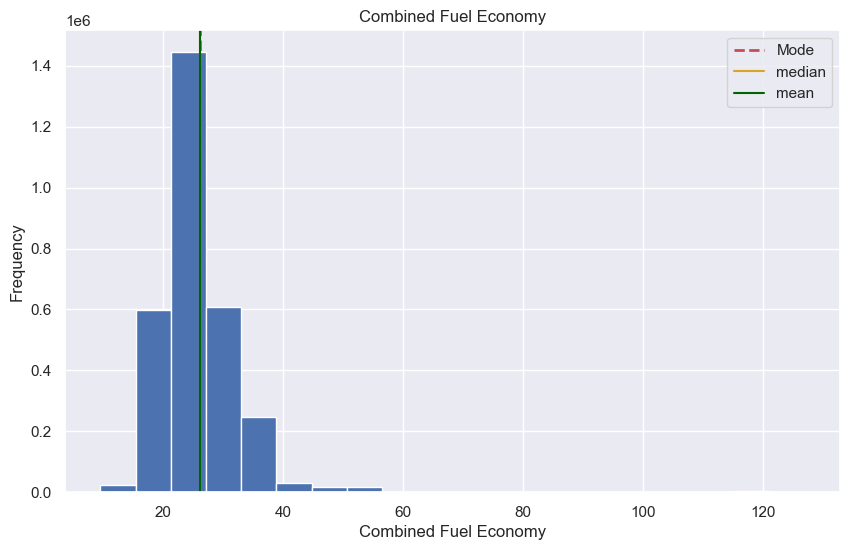

In [48]:
# plotting the distribution of the combined fuel economy column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['combined_fuel_economy'], bins=20)
plt.title('Combined Fuel Economy')
# Add the mode
plt.axvline(cars_df2['combined_fuel_economy'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['combined_fuel_economy'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['combined_fuel_economy'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Combined Fuel Economy')
plt.ylabel('Frequency')
plt.show()

In [49]:
# inspecting the mean, median, and mode of the combined fuel economy column
print(f"The mean of the combined fuel economy column is {cars_df2['combined_fuel_economy'].mean().round(2)} mpg.")

The mean of the combined fuel economy column is 26.08 mpg.


The results show that the majority of vehicles have a fuel economy of 26.08 miles per gallon. This is expected because most vehicles are fuel efficient.

---

### **description** 

The description is the sales description of the vehicle. 

In [50]:
# checking how many null values are in the column
percentage = cars_df2['description'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the description column are {percentage.round(2)}%.")

The amount of null values in the description column are 2.6%.


This is an a significant amount. Lets take a closer look.

In [51]:
# checking the value counts of the column
cars_df2['description'].sample(5)

vin
5TDFZRBH0LS047232    We are open online 24/7! Get pre-approved, rec...
JA4AS3AA6LZ001946    Alloy Silver 2020 Mitsubishi Eclipse Cross ES ...
3GNAXUEV2LL173593    Sturdy and dependable, this 2020 Chevrolet Equ...
W1NYC6BJ0LX360392    Lunar Blue Metallic 2020 Mercedes-Benz G-Class...
1FTEW1EP9GFD34356    **FRESH TRADE IN** Limited Time Second Chance ...
Name: description, dtype: object

It looks like the description is the sales pitch of the vehicle. Though this does describe some features of the vehicle, it is not useful for our analysis because this information is already in the other columns. We can drop this column due to redundancy.

In [52]:
# Dropping the description column
cars_df2.drop('description', axis=1, inplace=True)

---

### **engine_cylinders**

The engine cylinders is the number of cylinders in the engine.

In [53]:
# checking how many null values are in the column
percentage = cars_df2['engine_cylinders'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the engine_cylinders column are {percentage.round(2)}%.")

The amount of null values in the engine_cylinders column are 3.35%.


Lets take a closer look.

In [54]:
# checking the value counts of the column.
pd.DataFrame(cars_df2['engine_cylinders'].value_counts()/cars_df2.shape[0]*100)

,engine_cylinders
I4,47.276
V6,24.568
V8,9.331
V8 Flex Fuel Vehicle,2.612
I4 Hybrid,2.424
V6 Flex Fuel Vehicle,2.278
H4,2.195
I3,1.810
I6,0.944
I6 Diesel,0.781


The information in this column closely matches the information in the engine_type column, also this has information of the fuel type the vehicle uses. 

So we can drop this column from the dataset due to redundancy.

In [55]:
# dropping the column
cars_df2 = cars_df2.drop(['engine_cylinders'], axis=1)

---

### **engine_displacement**

The engine displacement is the displacement of the engine. This is a measurement of the engine size, which represents the volume of the engine. Many factors affect the displacement of an engine, including the number of cylinders, the size of the cylinders, and the stroke of the pistons. But because this is better represented in the horsepower column, we can drop this column.

In [56]:
# dropping the column
cars_df2 = cars_df2.drop(['engine_displacement'], axis=1)

---

### **exterior_color**

The exterior color is the color of the exterior of the vehicle.

In [57]:
# checking how many null values are in the column
percentage = cars_df2['exterior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {percentage}%.")

The amount of null values in the exterior_color column are 0.0008666666666666666%.


There is a very low amount of null values. Lets take a look at the exterior_color column.

In [58]:
# checking the value counts of the column.
cars_df2['exterior_color'].value_counts()/cars_df2.shape[0]*100

Black                                 5.415
White                                 4.219
Summit White                          3.214
Silver                                2.630
Gray                                  2.585
                                       ... 
Blue Dusk Clearcoat Metallic          0.000
Dark Performancesian Green Metallic   0.000
BRILLANT                              0.000
WHITE MET                             0.000
Cosmic                                0.000
Name: exterior_color, Length: 28665, dtype: float64

The results show that the color names are not consistent. There are too many off-brand colors that are not useful for our analysis. We can group these colors into a few categories. We can also see that there are a few vehicles that have multiple colors. We can split these vehicles into multiple rows so that each row has only one color.

Let's first fill in the null values with the most common color.

In [59]:
# replacing null values with Black.
cars_df2['exterior_color'].fillna("Black", inplace=True)

# checking result
result = cars_df2['exterior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {result.round(2)}%.")

The amount of null values in the exterior_color column are 0.0%.


Next, We can address the large amount of categories in the exterior_color column. Having a large amount of categories in the exterior_color column can result in a large amount of redundant information. So lets re-categorize the exterior_color column. 

According to GermainCars.com, America's most common exterior colors in 2022 are ranked as follows:

1. White
2. Black
3. Gray
4. Silver
5. Red
6. Blue
7. Brown
8. Green
9. Beige
10. Orange
11. Gold
12. Yellow
13. Purple

More information can be found at [GermainCars.com](https://www.germaincars.com/most-popular-car-colors/).

In [60]:
# making a list of the top exterior colors
colors = ['White', 'Black', 'Gray', 'Silver',
          'Red', 'Blue', 'Brown', 'Green', 'Beige',
          'Orange', 'Gold', 'Yellow', 'Purple']

# extracting the top exterior colors from the exterior_color column
cars_df2['exterior_color'] = cars_df2['exterior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

In [61]:
# checking the results
cars_df2['exterior_color'].value_counts()/cars_df2.shape[0]*100

                   24.610
White              21.117
Black              17.964
Silver             11.441
Blue                7.799
                    ...  
Gold, Red, White    0.000
Silver, Orange      0.000
Blue, Brown         0.000
Yellow, Gray        0.000
Gray, Beige         0.000
Name: exterior_color, Length: 83, dtype: float64

In [62]:
# checking the number of unique values in the exterior_color column
cars_df2['exterior_color'].nunique()

83

It looks like we can still clean up the column further.

In [63]:
# replacing null values with 'Other Color'.
cars_df2['exterior_color'].replace("", "Other Color", inplace=True)

# masking rows with more than one color
mask = cars_df2['exterior_color'].map(cars_df2['exterior_color'].value_counts()) < 4424

# labeling the rows with more than one color as 'Mixed Colors'
cars_df2['exterior_color'] =  cars_df2['exterior_color'].mask(mask, 'Mixed Colors')

# checking the new unique values in the exterior_color_new column
cars_df2['exterior_color'].value_counts()/cars_df2.shape[0]*100

Other Color    24.610
White          21.117
Black          17.964
Silver         11.441
Blue            7.799
Red             7.445
Gray            7.227
Green           0.683
Mixed Colors    0.407
Brown           0.368
Orange          0.351
Gold            0.290
Beige           0.149
Yellow          0.147
Name: exterior_color, dtype: float64

This looks much better. 

---

### **fleet**

The fleet represents whether the vehicle is a fleet vehicle or not. This is a categorical variable and will need to be encoded.

In [64]:
# checking how many null values are in the dataframe that are over 0%
percentage = cars_df2.isna().sum()/cars_df2.shape[0]*100

# checking the columns with null values
nulls = percentage[percentage > 0]

# putting the results in a dataframe
pd.DataFrame(nulls)

,0
engine_type,3.353
fleet,47.553
frame_damaged,47.553
franchise_make,19.087
front_legroom,5.309
fuel_tank_volume,5.309
fuel_type,2.757
has_accidents,47.553
height,5.309
horsepower,5.746


Notice there is a few null columns with the exact same null percentage. Let take a closer look at these columns.

In [65]:
# filtering the columns that match in null values
pd.DataFrame(percentage[percentage.between(47, 48)])

,0
fleet,47.553
frame_damaged,47.553
has_accidents,47.553
isCab,47.553
salvage,47.553
theft_title,47.553


This is telling us that the information in these columns are redundant. We can drop these columns and keep the fleet column. We will re-name the fleet column to `has_incidents`.

In [66]:
# dropping the columns
cars_df2 = cars_df2.drop(['frame_damaged', 'has_accidents', 'isCab', 'salvage', 'theft_title'], axis=1)

Now let fill in the null values with the most common value.

In [67]:
# filling the null values with "False" and renaming the column to "has_incidents"
cars_df2['fleet'].fillna("False", inplace=True)

# checking the result
cars_df2['fleet'].isna().sum()/cars_df2.shape[0]*100

# renaming the column to "has_incidents"
cars_df2.rename(columns={'fleet': 'has_incidents'}, inplace=True)

# checking the result
cars_df2.head()

,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_type,exterior_color,has_incidents,franchise_dealer,franchise_make,...,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.100,SUV / Crossover,Bayamon,522,960,I4,Yellow,False,True,Jeep,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019,26.083
SALCJ2FX1LH858117,38.100,SUV / Crossover,San Juan,207,922,I4,Black,False,True,Land Rover,...,A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.083
JF1VA2M67G9829723,35.400,Sedan,Guaynabo,1233,969,H4,Other Color,False,True,FIAT,...,M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in,2016,20.000
SALRR2RV0L2433391,37.600,SUV / Crossover,San Juan,196,922,V6,Gray,False,True,Land Rover,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020,26.083
SALCJ2FXXLH862327,38.100,SUV / Crossover,San Juan,137,922,I4,Black,False,True,Land Rover,...,A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.083


---

### **franchise_make**

The franchise make is the company that owns the franchise of the vehicle.

In [68]:
# checking how many null values are in the column
percentage = cars_df2['franchise_make'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the franchise_make column are {percentage.round(2)}%.")

The amount of null values in the franchise_make column are 19.09%.


This column has a lot of null values. Lets take a closer look.

In [69]:
# checking the unique values in the column
cars_df2['franchise_make'].unique()

array(['Jeep', 'Land Rover', 'FIAT', 'Chevrolet', 'Cadillac', 'Chrysler',
       'Dodge', 'RAM', nan, 'Kia', 'Mazda', 'Audi', 'Hyundai', 'Ford',
       'Toyota', 'Lincoln', 'Volvo', 'GMC', 'Volkswagen', 'BMW', 'Lexus',
       'Buick', 'Subaru', 'Scion', 'Honda', 'Nissan', 'Acura', 'INFINITI',
       'Porsche', 'Rolls-Royce', 'Bentley', 'Lamborghini',
       'Mercedes-Benz', 'Jaguar', 'Maserati', 'Alfa Romeo', 'Ferrari',
       'MINI', 'Mitsubishi', 'Aston Martin', 'Lotus', 'McLaren', 'Pagani',
       'Genesis', 'SRT', 'smart', 'Rover', 'Shelby', 'Freightliner'],
      dtype=object)

The information in this column closely matches the information in the make_name column. So we can drop this column from the dataset due to redundancy.

In [70]:
# dropping the column
cars_df2 = cars_df2.drop(['franchise_make'], axis=1)

---

### **front_legroom**

The front legroom is the amount of space available in the front of the vehicle.

In [71]:
# checking how many null values are in the column
percentage = cars_df2['front_legroom'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the front_legroom column are {percentage.round(2)}%.")

The amount of null values in the front_legroom column are 5.31%.


This column has a lot of null values. Lets take a closer look and see if we can find anything to fill in the null values with.

In [72]:
# checking the unique values in the column
cars_df2['front_legroom'].unique()

array(['41.2 in', '39.1 in', '43.3 in', '39 in', '40.2 in', '42.3 in',
       '40 in', '42.7 in', '42 in', '41.7 in', '41 in', '42.2 in',
       '45.4 in', '41.3 in', '40.3 in', '40.6 in', nan, '42.6 in',
       '40.4 in', '42.4 in', '39.5 in', '40.9 in', '41.8 in', '45.3 in',
       '42.5 in', '44.1 in', '--', '45.5 in', '42.9 in', '43.9 in',
       '41.5 in', '41.1 in', '43 in', '40.8 in', '45 in', '40.1 in',
       '44.5 in', '38.9 in', '45.8 in', '67 in', '41.4 in', '40.7 in',
       '40.5 in', '42.8 in', '44.8 in', '43.6 in', '41.9 in', '43.7 in',
       '43.8 in', '42.1 in', '52.5 in', '43.1 in', '39.9 in', '41.6 in',
       '45.7 in', '43.5 in', '44.4 in', '44.3 in', '43.2 in', '38.8 in',
       '46.1 in', '39.8 in', '44.6 in', '44.2 in', '45.1 in', '37.7 in',
       '46.4 in', '35.8 in', '39.6 in', '46.9 in', '39.4 in', '44.7 in',
       '46.3 in', '43.4 in', '38.7 in', '39.3 in', '44 in', '36.6 in',
       '38 in', '39.2 in', '53.6 in', '38.6 in', '46 in', '46.5 in',
       '0

In [73]:
# checking the value counts of the column.
cars_df2['front_legroom'].value_counts()/cars_df2.shape[0]*100

40.9 in   7.652
43.9 in   5.028
41.3 in   4.820
41 in     4.809
41.2 in   4.313
           ... 
33.5 in   0.000
54.4 in   0.000
38.3 in   0.000
39.2 in   0.000
61.4 in   0.000
Name: front_legroom, Length: 101, dtype: float64

Just like the back legroom column, the front legroom column will need to be cleaned up. Lets remove the special characters and convert the values to float.

In [74]:
# splitting the column and returning the first value
cars_df2['front_legroom'] = cars_df2['front_legroom'].str.split(' ').str[0]

# replacing "--" with a null value
cars_df2['front_legroom'].replace("--", np.nan , inplace=True)

# converting the back_legroom column to a float
cars_df2['front_legroom'] = pd.to_numeric(cars_df2['front_legroom'], downcast='float')

Now that the column is cleaned, lets first get a visual representation. This will help us determine if what we can fill in the null values with.

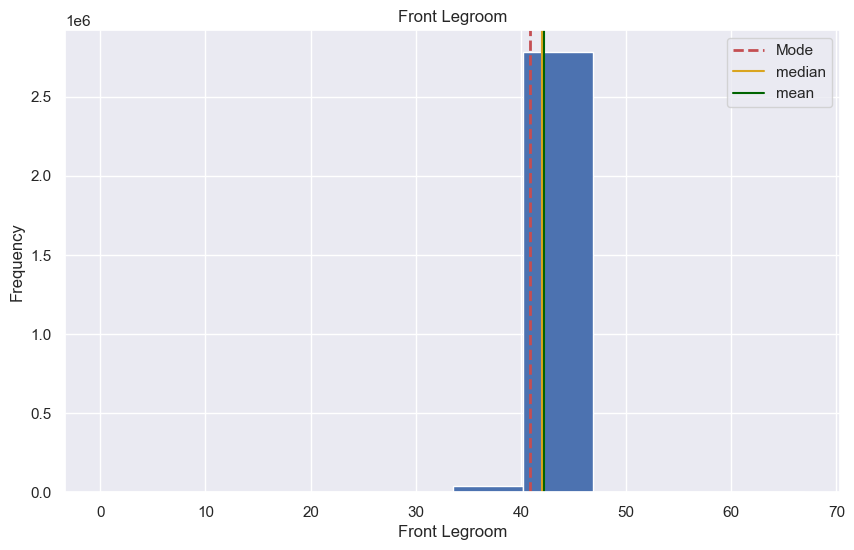

In [75]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['front_legroom'], bins=10)
plt.title("Front Legroom")
# Add the mode
plt.axvline(cars_df2['front_legroom'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['front_legroom'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['front_legroom'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Front Legroom')
plt.ylabel('Frequency')
plt.show()

It looks like the front legroom has a standard measurement range of approximately 40 to 45 inches. 

In this case, we can fill in the null values with the mean value.

In [76]:
# filling the null values with the mean of the column
cars_df2['front_legroom'].fillna(cars_df2['front_legroom'].mean(), inplace=True)

# checking the result
result = cars_df2['front_legroom'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the front_legroom column are {result.round(2)}%.")

The amount of null values in the front_legroom column are 0.0%.


Next, Lets combine the front legroom and back legroom columns to create a new column that will be more useful for our analysis. This will help reduce the amount of redundant information in the dataset, while also providing more information.

In [77]:
# combining the front_legroom and back_legroom columns
cars_df2['legroom'] = cars_df2['front_legroom'] + cars_df2['back_legroom']

# dropping the front_legroom and back_legroom columns
cars_df2 = cars_df2.drop(['front_legroom', 'back_legroom'], axis=1)

# checking the results
cars_df2.head()

,body_type,city,daysonmarket,dealer_zip,engine_type,exterior_color,has_incidents,franchise_dealer,fuel_tank_volume,fuel_type,...,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy,legroom
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,960,I4,Yellow,False,True,12.7 gal,Gasoline,...,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019,26.083,76.300
SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,922,I4,Black,False,True,17.7 gal,Gasoline,...,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.083,77.200
JF1VA2M67G9829723,Sedan,Guaynabo,1233,969,H4,Other Color,False,True,15.9 gal,Gasoline,...,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in,2016,20.000,78.700
SALRR2RV0L2433391,SUV / Crossover,San Juan,196,922,V6,Gray,False,True,23.5 gal,Gasoline,...,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020,26.083,76.600
SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,922,I4,Black,False,True,17.7 gal,Gasoline,...,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,26.083,77.200


Great! Now that we have a combined legroom column, we can move on to the next column.

---

### **fuel_tank_volume**

The fuel tank volume is the volume of the fuel tank. This is a measurement of the fuel tank size, which is measured in gallons.

In [78]:
# checking how many null values are in the column
percentage = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 5.31%.


Lets take a closer look at the fuel_tank_volume column.

In [79]:
# checking the value counts of the column.
cars_df2['fuel_tank_volume'].value_counts()/cars_df2.shape[0]*100

26 gal     6.761
13.2 gal   5.428
18.5 gal   4.823
14 gal     4.631
14.5 gal   3.321
            ... 
25.5 gal   0.000
25.2 gal   0.000
40.7 gal   0.000
23.1 gal   0.000
26.3 gal   0.000
Name: fuel_tank_volume, Length: 182, dtype: float64

Since the fuel_tank_volume column is a measurement of the fuel tank size, what about the fuel tank size of the electric vehicles?

In [80]:
# filtering the rows that the fuel_type column is "Electric", with the fuel_tank_volume column.
cars_df2.loc[(cars_df2['fuel_type'] == "Electric"), ['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
KNDJP3AE3H7024713,NaN,Electric
KNDCC3LG4K5009935,NaN,Electric
1G1FZ6S05L4121127,NaN,Electric
1G1FZ6S06L4123999,NaN,Electric
KMHC75LH4HU008626,NaN,Electric
...,...,...
1G1FW6S07H4129990,NaN,Electric
1G1FX6S07H4156779,NaN,Electric
1G1FX6S00H4145672,NaN,Electric


As expected, the fuel tank volume of the electric vehicles is null. We can fill in the null values with 0. 

But first, lets clean up the column so that the values are in float format.

In [81]:
# splitting the column and returning the first value
cars_df2['fuel_tank_volume'] = cars_df2['fuel_tank_volume'].str.split(' ').str[0]

# replacing "--" with np.nan
cars_df2['fuel_tank_volume'].replace("--", np.nan , inplace=True)

# converting the fuel_tank_volume column to a float
cars_df2['fuel_tank_volume'] = pd.to_numeric(cars_df2['fuel_tank_volume'], downcast='float')

Now that the column is cleaned, lets first full the null values with 0 on the electric vehicles only.

In [82]:
# filling the null values with the 0 value on electric cars only.
cars_df2.loc[(cars_df2['fuel_type'] == "Electric"), 'fuel_tank_volume'] = 0

# checking the result
result = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {result.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 4.81%.


Now lets see what null values are left.

In [83]:
# checking the null values rows
cars_df2[cars_df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
4S3GTAA67J3747545,NaN,NaN
WDDGF8BBXCR195380,NaN,Gasoline
3VW447AU9JM257055,NaN,Gasoline
1J4GR48K25C565853,NaN,NaN
1GTGG25VX51224016,NaN,Gasoline
...,...,...
1FTEW1P45LKD12200,NaN,Gasoline
1FTFW1ET8CFB42101,NaN,Gasoline
1FTEW1EG7GKD83935,NaN,Gasoline


We will fill in the rest of the null values with the mean value of the fuel tank volume.

In [84]:
# filling the null values with the mean based on the fuel_type column.
cars_df2['fuel_tank_volume'].fillna(cars_df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)

# checking the result
result = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100
 
print(f"The amount of null values in the fuel_tank_volume column are {result.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 1.67%.


Looks like there are still a few null values left. Lets take a closer look.

In [85]:
# checking the null values rows
cars_df2[cars_df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
4S3GTAA67J3747545,NaN,NaN
1J4GR48K25C565853,NaN,NaN
1W80L8Z430445,NaN,NaN
JF1GH6A66BH821983,NaN,NaN
1C6HJTAG4ML510604,NaN,NaN
...,...,...
1GD29LE7XLF280531,NaN,NaN
1GD29LE71LF292602,NaN,NaN
1GD29LE72LF292298,NaN,NaN


It looks like we will need to address the nulls in the fuel_type column first. This will help us fill in the null values in the fuel_tank_volume column.

---

### **fuel_type**

The fuel type is the type of fuel the vehicle uses.

In [86]:
# checking how many null values are in the column
percent = cars_df2['fuel_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_type column are {percent.round(2)}%.")

The amount of null values in the fuel_type column are 2.76%.


Lets take a closer look at the fuel_type column and see if we can fill in the null values with some reasonable values.

In [87]:
# checking the value counts of the column.
cars_df2['fuel_type'].value_counts()/cars_df2.shape[0]*100

Gasoline                 86.613
Flex Fuel Vehicle         5.200
Hybrid                    2.534
Diesel                    1.482
Biodiesel                 0.862
Electric                  0.547
Compressed Natural Gas    0.005
Propane                   0.000
Name: fuel_type, dtype: float64

Notice that majority of vehicles are Gasoline. This should come as no surprise since the majority of vehicles are gas powered.

Lets take a look at the null rows and see if we can use to fill in the null values.

In [88]:
# checking the null values rows
cars_df2[cars_df2['fuel_type'].isna()][['fuel_type','fuel_tank_volume','engine_type','make_name','model_name']]

,fuel_type,fuel_tank_volume,engine_type,make_name,model_name
vin,,,,,
ZACCJBBB9HPF62165,NaN,12.700,NaN,Jeep,Renegade
4S3GTAA67J3747545,NaN,NaN,NaN,Subaru,Impreza
1C3CCBBG6DN528083,NaN,16.900,NaN,Chrysler,200
1C4RJFLTXKC690774,NaN,24.600,NaN,Jeep,Grand Cherokee
1C6SRFKT8KN500431,NaN,26.000,NaN,RAM,1500
...,...,...,...,...,...
1FT8W3BN0LEC89903,NaN,48.000,NaN,Ford,F-350 Super Duty
1FTBF2AN5LEC89915,NaN,34.000,NaN,Ford,F-250 Super Duty
1FT7W2BN8LEC71963,NaN,48.000,NaN,Ford,F-250 Super Duty


It looks like these are all gas vehicles. We can fill in the null values with 'Gasoline'.

In [89]:
# filling the null values with "Gasoline".
cars_df2['fuel_type'].fillna("Gasoline", inplace=True)

# checking the result
percentage = cars_df2['fuel_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_type column are {percentage.round(2)}%.")

The amount of null values in the fuel_type column are 0.0%.


Now that the null values have been filled in, lets go back to the fuel_tank_volume column and see if we can fill in the rest of the null values.

In [90]:
# checking the null values rows in the fuel_tank_volume column
cars_df2[cars_df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
4S3GTAA67J3747545,NaN,Gasoline
1J4GR48K25C565853,NaN,Gasoline
1W80L8Z430445,NaN,Gasoline
JF1GH6A66BH821983,NaN,Gasoline
1C6HJTAG4ML510604,NaN,Gasoline
...,...,...
1GD29LE7XLF280531,NaN,Gasoline
1GD29LE71LF292602,NaN,Gasoline
1GD29LE72LF292298,NaN,Gasoline


Great, Now that we know the nulls are all gas vehicles, we can fill in the rest of the null values with the mean value of the fuel tank volume.

In [91]:
# filling the null values with the mean based on the fuel_tank_volume column.
cars_df2['fuel_tank_volume'].fillna(cars_df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)

# checking the result
percentage = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 0.0%.


---

### **engine_type**

The engine type is the type of engine the vehicle has. The engine type can also be used to determine the engine size of the vehicle, and how many cylinders the vehicle has.

In [92]:
percentage = cars_df2['engine_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the engine_type column are {percentage.round(2)}%.")

The amount of null values in the engine_type column are 3.35%.


Lets take a look at the engine_type column and see if we can find anything to fill in the null values with.

In [93]:
# checking the unique values in the engine_type column
cars_df2['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', 'V6 Diesel', nan, 'V8', 'V8 Biodiesel',
       'V8 Flex Fuel Vehicle', 'V6 Flex Fuel Vehicle', 'I4 Hybrid',
       'V6 Hybrid', 'I3', 'I5', 'I4 Flex Fuel Vehicle', 'I4 Diesel',
       'I6 Diesel', 'V8 Diesel', 'R2', 'W12', 'V10', 'V12',
       'V6 Biodiesel', 'H6', 'I2', 'W12 Flex Fuel Vehicle',
       'I5 Biodiesel', 'V8 Hybrid', 'H4 Hybrid',
       'V8 Compressed Natural Gas', 'I6 Hybrid', 'I5 Diesel', 'W8',
       'I4 Compressed Natural Gas', 'V10 Diesel', 'W16', 'V8 Propane',
       'I3 Hybrid', 'V6 Compressed Natural Gas', 'V12 Hybrid'],
      dtype=object)

In [94]:
# checking the value counts of the column.
cars_df2['engine_type'].value_counts()/cars_df2.shape[0]*100

I4                          47.276
V6                          24.568
V8                           9.331
V8 Flex Fuel Vehicle         2.612
I4 Hybrid                    2.424
V6 Flex Fuel Vehicle         2.278
H4                           2.195
I3                           1.810
I6                           0.944
I6 Diesel                    0.781
V8 Biodiesel                 0.738
I4 Flex Fuel Vehicle         0.306
I4 Diesel                    0.240
V6 Diesel                    0.222
V8 Diesel                    0.209
I5                           0.177
H6                           0.156
V6 Biodiesel                 0.120
V6 Hybrid                    0.102
V12                          0.044
V10                          0.043
I2                           0.030
W12                          0.016
V8 Hybrid                    0.004
W12 Flex Fuel Vehicle        0.003
I5 Biodiesel                 0.003
V8 Compressed Natural Gas    0.003
H4 Hybrid                    0.003
R2                  

It looks like the majority of vehicles have a 4 cylinder engine. We can also see that this column shows the fuel type of the vehicle. We can remove the fuel type from the column and just have this column represent the engine type. The fuel type is already represented in the fuel_type column.

In [95]:
# selecting the first string in the engine_type column
cars_df2['engine_type'] = cars_df2['engine_type'].str.split(' ').str[0]

# checking the unique values in the engine_type column
cars_df2['engine_type'].unique()

array(['I4', 'H4', 'V6', 'I6', nan, 'V8', 'I3', 'I5', 'R2', 'W12', 'V10',
       'V12', 'H6', 'I2', 'W8', 'W16'], dtype=object)

Now lets take a look at the null rows and see if we can use to fill in the null values.

In [96]:
# looking at the null rows
cars_df2.loc[cars_df2['engine_type'].isna(),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
vin,,,,
ZACCJBBB9HPF62165,Jeep,Renegade,NaN,Gasoline
4S3GTAA67J3747545,Subaru,Impreza,NaN,Gasoline
1C3CCBBG6DN528083,Chrysler,200,NaN,Gasoline
1C4RJFLTXKC690774,Jeep,Grand Cherokee,NaN,Gasoline
1C6SRFKT8KN500431,RAM,1500,NaN,Gasoline
...,...,...,...,...
1G1FX6S07H4156779,Chevrolet,Bolt EV,NaN,Electric
1G1FX6S00H4145672,Chevrolet,Bolt EV,NaN,Electric
1N4AZ0CP6GC309456,Nissan,LEAF,NaN,Electric


It looks like the null values are a mix of electric and gas vehicles. Lets first take a look at the electric vehicles.

In [97]:
# looking at the null rows that the fuel_type column is "Electric"
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Electric"),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
vin,,,,
KNDJP3AE3H7024713,Kia,Soul EV,NaN,Electric
KNDCC3LG4K5009935,Kia,Niro EV,NaN,Electric
1G1FZ6S05L4121127,Chevrolet,Bolt EV,NaN,Electric
1G1FZ6S06L4123999,Chevrolet,Bolt EV,NaN,Electric
KMHC75LH4HU008626,Hyundai,Ioniq Electric,NaN,Electric
...,...,...,...,...
1G1FW6S07H4129990,Chevrolet,Bolt EV,NaN,Electric
1G1FX6S07H4156779,Chevrolet,Bolt EV,NaN,Electric
1G1FX6S00H4145672,Chevrolet,Bolt EV,NaN,Electric


Next, lets fill these null values with electric.

In [98]:
# filling the null values with the fuel_type "Electric" with the "Electric Motor" value.
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Electric"), 'engine_type'] = "Electric Motor"

Next, lets fill in the rest of the null values with the the "Gasoline" engine type.

In [99]:
# filling the null values with the fuel_type "Gasoline" with the "I4" value.
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Gasoline"), 'engine_type'] = "Gasoline engine"

And now we have successfully filled in all the null values in the engine_type column.

Lets do a quick sanity check to make sure we didn't miss any null values.

In [100]:
# checking for nulls
result = cars_df2['engine_type'].isna().sum()/cars_df2.shape[0]*100
 
print(f"The amount of null values in the engine_type column are {result}%.")

The amount of null values in the engine_type column are 0.027666666666666666%.


We still have a few null values left. Lets take a closer look.

In [101]:
# checking the null values rows in the engine_type column
cars_df2[cars_df2['engine_type'].isna()][['engine_type','fuel_type']]

,engine_type,fuel_type
vin,,
1FDAW57R18EA08459,NaN,Diesel
1FDAF57R98EC86980,NaN,Diesel
3C7WRMDL2DG554902,NaN,Diesel
1FDUF5HT9KDA03658,NaN,Diesel
1FDUF5HT3KDA08497,NaN,Diesel
...,...,...
1FDUF5GT9KEG81032,NaN,Diesel
1FDUF5GT6KEF42475,NaN,Diesel
1FDUF5GTXKEF42513,NaN,Diesel


Looks like we missed the Diesel vehicles. Lets fill in the null values with the "Diesel" engine type.

In [102]:
# filling the null values with the fuel_type "Diesel" with the "Diesel" value.
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Diesel"), 'engine_type'] = "Diesel engine"

Let's get a visual representation of the engine types.

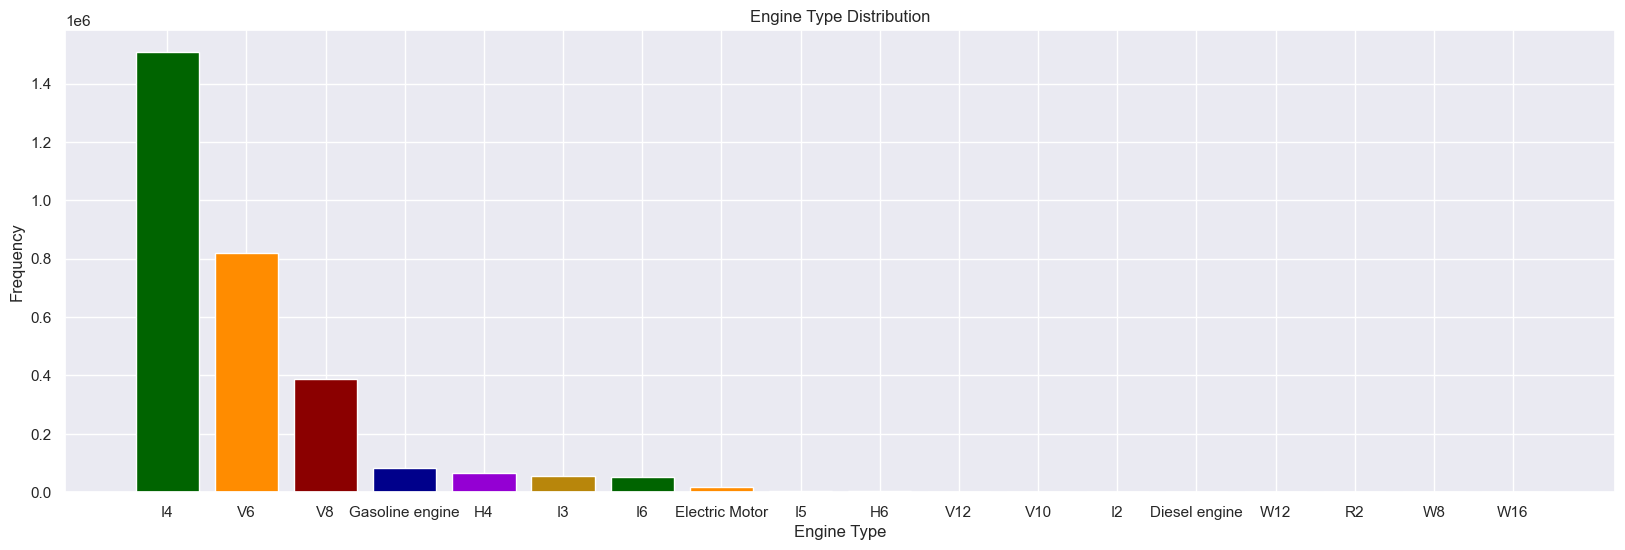

In [103]:
# plotting the distribution of the engine_type column
plt.figure(figsize=(20,6))
plt.bar(cars_df2['engine_type'].value_counts().index, cars_df2['engine_type'].value_counts(),
        color=['darkgreen','darkorange','darkred','darkblue','darkviolet','darkgoldenrod'])
plt.title('Engine Type Distribution')
plt.xlabel('Engine Type')
plt.ylabel('Frequency')
plt.show()

We can see that the majority of vehicles have a 4 cylinder engine, followed by a 6 cylinder engines and 8 cylinder engines.

---

### **height**

The height is the height of the vehicle. This is a measurement of the vehicle height, which is measured in inches.

In [104]:
# checking how many null values are in the column
percent = cars_df2['height'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the height column are {percent.round(2)}%.")

The amount of null values in the height column are 5.31%.


Let take a closer look at the height column.

In [105]:
# checking the value counts of the column.
cars_df2['height'].value_counts()/cars_df2.shape[0]*100

66.1 in   2.839
66.3 in   2.585
56.5 in   2.440
56.9 in   2.418
65.4 in   2.303
           ... 
96.2 in   0.000
93.3 in   0.000
104 in    0.000
82.5 in   0.000
103 in    0.000
Name: height, Length: 472, dtype: float64

In [106]:
# checking the unique values in the column
cars_df2['height'].unique()

array(['66.5 in', '68 in', '58.1 in', '73 in', '66.3 in', '56.9 in',
       '64.9 in', '46.6 in', '56.5 in', '60.7 in', '66.2 in', '57.6 in',
       '55.1 in', '70.7 in', '60.9 in', '69.9 in', '69.3 in', '65 in',
       nan, '64.1 in', '58.7 in', '58.4 in', '71 in', '70.8 in',
       '70.9 in', '73.6 in', '56.6 in', '65.4 in', '58.5 in', '73.9 in',
       '65.3 in', '55.7 in', '67.7 in', '64.5 in', '58.3 in', '57.7 in',
       '76.3 in', '66.1 in', '54.6 in', '74.4 in', '66 in', '64.8 in',
       '55.8 in', '69.4 in', '53.1 in', '72.6 in', '56.7 in', '67.1 in',
       '57.1 in', '77.4 in', '57.4 in', '65.7 in', '81.3 in', '70.6 in',
       '70.2 in', '69 in', '67 in', '77.6 in', '54.4 in', '75.5 in',
       '57 in', '72.3 in', '58.9 in', '67.4 in', '75.6 in', '66.9 in',
       '70.1 in', '77.5 in', '74 in', '78.2 in', '72.1 in', '81.2 in',
       '49.3 in', '67.9 in', '57.8 in', '79.3 in', '52.9 in', '67.3 in',
       '56.8 in', '56.2 in', '63.3 in', '56.3 in', '83.4 in', '68.9 in',
  

Lets begin by cleaning up the column. We will remove the special characters and convert the values to float.

In [107]:
# splitting the column and returning the first value
cars_df2['height'] = cars_df2['height'].str.split(' ').str[0]

# replacing "--" with np.nan
cars_df2['height'].replace("--", np.nan , inplace=True)

# converting the height column to a float
cars_df2['height'] = pd.to_numeric(cars_df2['height'], downcast='float')

Now that the column is cleaned, lets get a visual representation. This will help us determine if we can fill in the null values with a mean or median value.

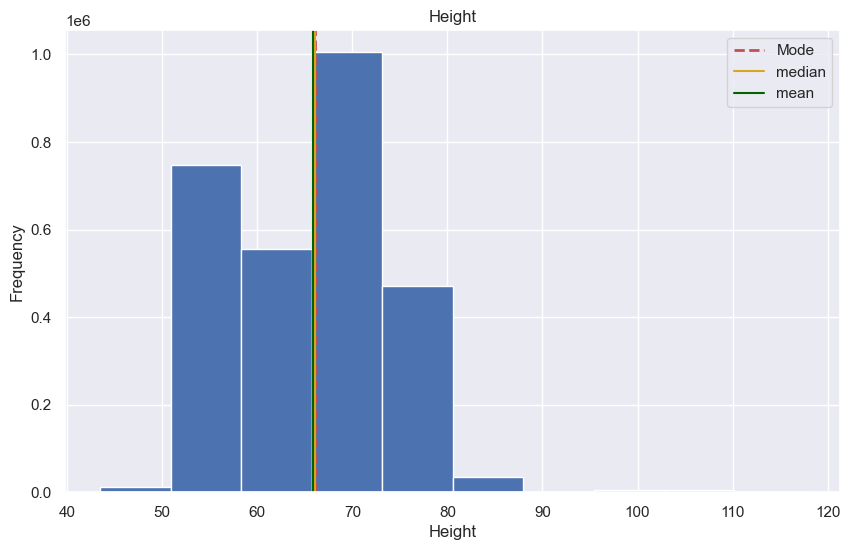

In [108]:
plt.figure(figsize=(10,6))
plt.hist(cars_df2['height'], bins=10)
plt.title("Height")
# Add the mode
plt.axvline(cars_df2['height'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['height'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['height'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

Looking at the graph, it looks like the height of the vehicles have a wide range of values. This means that we can fill in the null values with the mean value.

In [109]:
# filling the null values with the mean of the column
cars_df2['height'].fillna(cars_df2['height'].mean(), inplace=True)

# checking the result
result = cars_df2['height'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the height column are {result.round(2)}%.")

The amount of null values in the height column are 0.0%.


--- 

### **horsepower**

The horsepower represents how much power is produced by the engine.

In [110]:
# checking how many null values are in the column
percentage = cars_df2['horsepower'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

The amount of null values in the horsepower column are 5.75%.


Lets take a closer look at the horsepower column.

In [111]:
# checking the value counts of the column.
cars_df2['horsepower'].value_counts()/cars_df2.shape[0]*100

170.000   4.029
375.000   2.619
395.000   2.556
310.000   2.343
180.000   2.333
           ... 
313.000   0.000
91.000    0.000
77.000    0.000
65.000    0.000
69.000    0.000
Name: horsepower, Length: 455, dtype: float64

Typically, you can expect the average car horsepower to fall between 180 and 200 horsepower in a mainstream car. So in this case, we can use the most common value to fill in the null values. More information on this can be found on [https://www.autolist.com/guides/average-car-horsepower](https://www.autolist.com/guides/average-car-horsepower).

In [112]:
# filling the null values with the most common value
cars_df2['horsepower'].fillna(cars_df2['horsepower'].mode()[0], inplace=True)

# checking the result
percentage = cars_df2['horsepower'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

The amount of null values in the horsepower column are 0.0%.


---

### **interior_color**

The interior color is the color of the interior of the vehicle.

In [113]:
# checking how many null values are in the column
percentage = cars_df2['interior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the interior_color column are {percentage.round(2)}%.")

The amount of null values in the interior_color column are 0.01%.


This is a very low amount of null values. We can just fill in the null values with the most common value.

In [114]:
# checking the value counts of the column.
cars_df2['interior_color'].value_counts()/cars_df2.shape[0]*100

Black                                                        29.046
None                                                         12.794
Gray                                                          6.530
Jet Black                                                     6.206
Black (Ebony)                                                 4.761
                                                              ...  
Brown (Cappuccino w/Heated Lincoln Soft Touch Front Seats)    0.000
Circuit Red Nuluxe[nuluxe] With Dark Gray Streamli            0.000
Nut Brown/ Black Leather                                      0.000
Black/Orange w/Fabric Seat Trim (FD)                          0.000
Brown (Espresso/Iv/Tan/Esp/Iv/Iv)                             0.000
Name: interior_color, Length: 45726, dtype: float64

In [115]:
# filling the null values with the most frequent value
cars_df2['interior_color'].fillna("Black", inplace=True)

# checking the result
result = cars_df2['interior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the interior_color column are {result.round(2)}%.")

The amount of null values in the interior_color column are 0.0%.


Before we move on, we will need to address the large amount of categories in the interior_color column. Having a large amount of categories in the interior_color column can result in a large amount of redundant information. So lets re-categorize the interior_color column to reduce the amount of categories.

In [116]:
# Adding a new column based on the list of primary colors.
colors = ['White', 'Black', 'Gray', 'Silver', 
          'Red', 'Blue', 'Brown', 'Green', 
          'Beige', 'Orange', 'Gold', 'Yellow', 'Purple']

cars_df2['interior_color'] = cars_df2['interior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')


In [117]:
# checking the result
cars_df2['interior_color'].value_counts()

Black                 1572862
                       643421
Gray                   374038
White                   91438
Brown                   74539
                       ...   
Silver, Green               1
Purple, Green               1
White, Gold                 1
Orange, White               1
Silver, Blue, Gray          1
Name: interior_color, Length: 82, dtype: int64

Looks like we still need to clean the column further.

In [118]:
# replacing null values with 'Other Color'.
cars_df2['interior_color'].replace("", "Other Color", inplace=True)

# masking the colors that are Mixed Colors.
mask = cars_df2['interior_color'].map(cars_df2['interior_color'].value_counts()) < 29
mask2 = cars_df2['interior_color'].map(cars_df2['interior_color'].value_counts()).between(30, 110) 
mask3 = cars_df2['interior_color'].map(cars_df2['interior_color'].value_counts()).between(186, 1091)
mask4 = cars_df2['interior_color'].map(cars_df2['interior_color'].value_counts()).between(2121, 12064)

# converting the masked colors to Mixed Colors.
cars_df2['interior_color'] =  cars_df2['interior_color'].mask(mask, 'Mixed Colors')
cars_df2['interior_color'] =  cars_df2['interior_color'].mask(mask2, 'Mixed Colors')
cars_df2['interior_color'] =  cars_df2['interior_color'].mask(mask3, 'Mixed Colors')
cars_df2['interior_color'] =  cars_df2['interior_color'].mask(mask4, 'Mixed Colors')

# checking the new unique values in the exterior_color_new column
cars_df2['interior_color'].value_counts()/cars_df2.shape[0]*100

Black          52.429
Other Color    21.447
Gray           12.468
White           3.048
Brown           2.485
Brown, Beige    2.272
Black, Gray     1.556
Mixed Colors    1.410
Red             1.125
Silver          0.804
Blue            0.760
Green           0.069
Black, White    0.041
Gold            0.040
Orange          0.037
Yellow          0.005
Purple          0.004
Name: interior_color, dtype: float64

We're almost there! We can now clean the column further.

In [119]:
# replacing all rows with more than one color with 'Mixed Colors'.
cars_df2['interior_color'].replace(["Brown, Beige","Gray, Black","Black, White"],"Mixed Colors", inplace=True)

# checking the new unique values in the exterior_color_new column
cars_df2['interior_color'].value_counts()/cars_df2.shape[0]*100

Black          52.429
Other Color    21.447
Gray           12.468
Mixed Colors    3.723
White           3.048
Brown           2.485
Black, Gray     1.556
Red             1.125
Silver          0.804
Blue            0.760
Green           0.069
Gold            0.040
Orange          0.037
Yellow          0.005
Purple          0.004
Name: interior_color, dtype: float64

Great! We have successfully cleaned the interior_color column.

---

### **length**

The length is the length of the vehicle. This is measured in inches.

In [120]:
# checking how many null values are in the column
percentage = cars_df2['length'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the length column are {percentage.round(2)}%.")

The amount of null values in the length column are 5.31%.


There is a lot of null values in this column. Lets take a closer look.

In [121]:
# checking the value counts of the column.
cars_df2['length'].value_counts()/cars_df2.shape[0]*100

231.9 in   3.257
183.1 in   2.158
231.7 in   1.927
182.3 in   1.830
184.5 in   1.707
            ... 
160.2 in   0.000
151.6 in   0.000
156.4 in   0.000
148.5 in   0.000
235.1 in   0.000
Name: length, Length: 836, dtype: float64

In [122]:
# checking the unique values in the column
cars_df2['length'].unique()

array(['166.6 in', '181 in', '180.9 in', '195.1 in', '188.9 in',
       '183.5 in', '172.1 in', '157.5 in', '182.5 in', '168.3 in',
       '179.1 in', '179.9 in', '193.8 in', '184.8 in', '204.3 in',
       '203.7 in', '189.8 in', '175.1 in', nan, '166.9 in', '181.1 in',
       '192.3 in', '191.7 in', '187.8 in', '192.1 in', '173.4 in',
       '201.2 in', '188.4 in', '182.3 in', '183.1 in', '200.8 in',
       '230 in', '183.3 in', '192.5 in', '191.1 in', '198.3 in', '210 in',
       '189.9 in', '192.6 in', '203.9 in', '176.2 in', '174.7 in',
       '203.6 in', '224.4 in', '188.3 in', '167.6 in', '183.9 in',
       '175.3 in', '173 in', '184.9 in', '192.8 in', '182 in', '175.6 in',
       '189.2 in', '174.5 in', '196.9 in', '191.5 in', '197.6 in',
       '183.7 in', '250 in', '224.9 in', '198.5 in', '204 in', '198.4 in',
       '224 in', '199.4 in', '191.4 in', '187.4 in', '190.3 in',
       '232.9 in', '231.7 in', '197.5 in', '196.8 in', '201.3 in',
       '190.8 in', '186.3 in', '178.2

We can see that the this is a numeric column, so we can replace the null values with the average value of the column. But first, we will need to clean the column further.

In [123]:
# splitting the column and returning the first value
cars_df2['length'] = cars_df2['length'].str.split(' ').str[0]

# replacing "--" with np.nan
cars_df2['length'].replace("--", np.nan , inplace=True)

# converting the length column to a float
cars_df2['length'] = pd.to_numeric(cars_df2['length'], downcast='float')

Now that the column is cleaned, lets get a visual representation. This will help us determine if we can fill in the null values with a mean or median value.

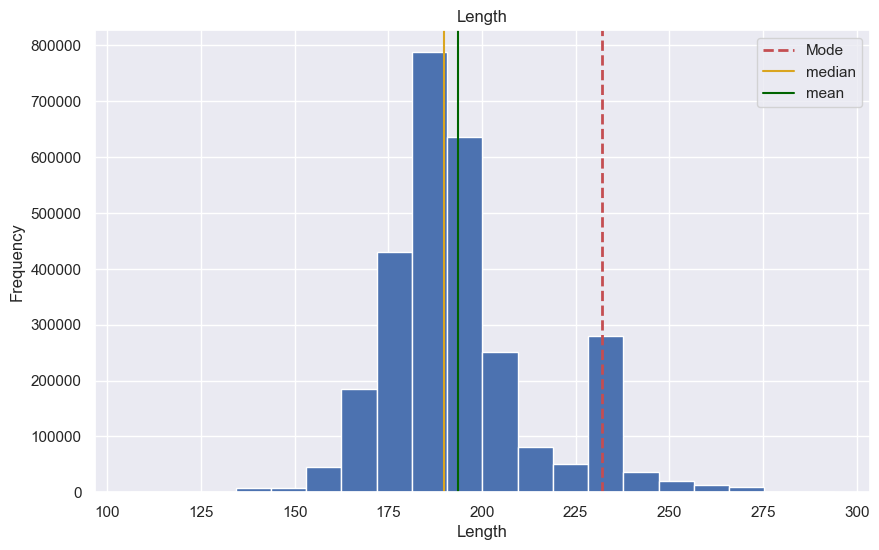

In [124]:
# plotting the distribution of the length column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['length'], bins=20)
plt.title('Length')
# Add the mode
plt.axvline(cars_df2['length'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['length'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['length'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

We can see that the length of the vehicles have a wide range of values. This means that the mean value is a better option to fill in the null values.

In [125]:
# filling the null values with the median of the column
cars_df2['length'].fillna(cars_df2['length'].median(), inplace=True)

# checking the result
result = cars_df2['length'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the length column are {result.round(2)}%.")

The amount of null values in the length column are 0.0%.


---

### **main_picture_url**

The main picture url is the url of the main picture of the vehicle. This is a link to the main picture of the vehicle. Since this is a price prediction model, we will not be using this column. We will drop this column from the dataset.

In [126]:
# dropping the column
cars_df2.drop('main_picture_url', axis=1, inplace=True)

---

### **major_options**

Major options is a list of the major options the vehicle has. This will be helpful in adding more features to the model.

In [127]:
# checking how many null values are in the column
percentage = cars_df2['major_options'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the major_options column are {percentage.round(2)}%.")

The amount of null values in the major_options column are 6.67%.


There is a lot of null values in this column. Lets take a closer look.

In [128]:
# checking the value counts
cars_df2['major_options'].value_counts()/cars_df2.shape[0]*100

['Alloy Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                                                                                                     2.969
['Alloy Wheels']                                                                                                                                                                                                                                                   1.376
['Steel Wheels']                                                                                                                                                                                                                                                   1.367
['Bluetooth', 'Backup Camera']                                                                                                                                                                               

To make the column easier to work with, we will just convert the column into a new column called 'major_options_count'. This will be the number of major options the vehicle has. We will also drop the major_options column from the dataset. 

In [129]:
# creating a major_options_count column to count the number of major options
cars_df2['major_options_count'] = cars_df2['major_options'].str.count(',') + 1
 
# checking the result
cars_df2['major_options_count'].value_counts()

4.000     340504
3.000     314017
5.000     307010
6.000     282661
7.000     249399
8.000     225955
2.000     224622
1.000     183388
9.000     183370
10.000    150292
11.000    115621
12.000     80844
13.000     51701
14.000     32477
15.000     18990
16.000     12780
17.000      8002
18.000      5175
19.000      3521
20.000      2501
21.000      1640
22.000      1273
23.000      1063
24.000       746
25.000       623
26.000       492
27.000       311
28.000       222
29.000       211
30.000       125
31.000        93
32.000        89
33.000        56
34.000        48
35.000        41
36.000        24
38.000        14
37.000        12
39.000         7
40.000         6
45.000         4
41.000         4
44.000         3
48.000         3
53.000         2
49.000         2
52.000         2
50.000         2
43.000         2
42.000         1
59.000         1
57.000         1
47.000         1
Name: major_options_count, dtype: int64

Lets get a visual representation of the major_options_count column.

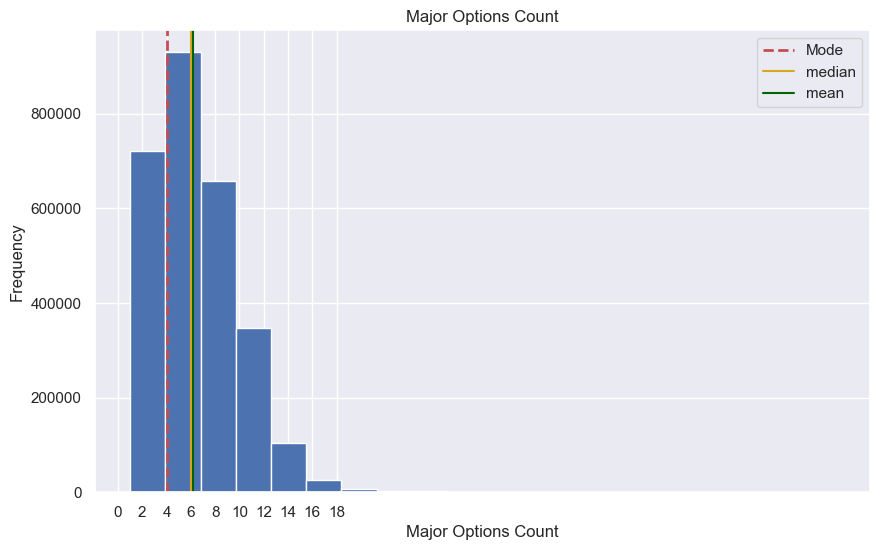

In [130]:
# plotting the distribution of the major_options_count column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['major_options_count'], bins=20)
plt.title('Major Options Count')
# Add the mode
plt.axvline(cars_df2['major_options_count'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['major_options_count'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['major_options_count'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Major Options Count')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 20, 2))
plt.show()

As we can see, the majority of vehicles have 4 to 6 major options. We can fill in the null values with the mean value of the column.

In [131]:
# filling the null values with the mean of the column
cars_df2['major_options_count'].fillna(cars_df2['major_options_count'].mean(), inplace=True)
 
# checking the result
result = cars_df2['major_options_count'].isna().sum()/cars_df2.shape[0]*100
 
print(f"The amount of null values in the major_options_count column are {result.round(2)}%.")

The amount of null values in the major_options_count column are 0.0%.


Lets not forget to drop the major_options column from the dataset as well.

In [132]:
# dropping the major_options column
cars_df2.drop('major_options', axis=1, inplace=True)

---

### **maximum_seating**

Maximum seating is the maximum amount of people that can be seated in the vehicle.

In [133]:
# checking how many null values are in the column
percentage = cars_df2['maximum_seating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {percentage.round(2)}%.")

The amount of null values in the maximum_seating column are 5.31%.


There is a lot of null values in this column. Lets take a closer look.

In [134]:
# checking the value_counts of the column
cars_df2['maximum_seating'].value_counts()/cars_df2.shape[0]*100

5 seats    62.511
7 seats    10.178
6 seats    10.049
8 seats     6.679
4 seats     2.706
2 seats     1.170
3 seats     0.989
15 seats    0.197
9 seats     0.121
12 seats    0.057
10 seats    0.018
--          0.017
Name: maximum_seating, dtype: float64

In [135]:
# checking the unique values of the column
cars_df2['maximum_seating'].unique()

array(['5 seats', '7 seats', '2 seats', '4 seats', '8 seats', nan,
       '6 seats', '9 seats', '3 seats', '--', '15 seats', '12 seats',
       '10 seats'], dtype=object)

The standard modern car has a maximum seating capacity of 5 people. So we can replace the null values with the value '5 seats'. But before we can do that, we will need to clean the column further.

In [136]:
# replacing the "--" with np.nan
cars_df2['maximum_seating'].replace("--", np.nan , inplace=True)

# filling the null values with a new value called the most frequent value.
cars_df2['maximum_seating'].fillna("5 seats", inplace=True)

# checking the result
result = cars_df2['maximum_seating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {result.round(2)}%.")

The amount of null values in the maximum_seating column are 0.0%.


Lets also remove the word 'seats' from the column.

In [137]:
# removing the " seats" from the column
cars_df2['maximum_seating'] = cars_df2['maximum_seating'].str.replace(" seats", "")

# converting the column to a int
cars_df2['maximum_seating'] = pd.to_numeric(cars_df2['maximum_seating'], downcast='integer')

# checking the result
cars_df2['maximum_seating'].value_counts()

5     2035099
7      305325
6      301481
8      200358
4       81173
2       35105
3       29676
15       5906
9        3634
12       1703
10        540
Name: maximum_seating, dtype: int64

Great! We have successfully cleaned the maximum_seating column.

---

### **mileage**

Milage is the mileage of the vehicle. This measures how many miles the vehicle has been driven. This is a very important feature in determining the price of the vehicle. The higher the mileage, the lower the price.

In [138]:
# checking how many null values are in the column
percentage = cars_df2['mileage'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the mileage column are {percentage.round(2)}%.")

The amount of null values in the mileage column are 4.81%.


This is a large amount of null values. Lets take a closer look and see if we can find anything to fill in the null values with.

In [139]:
# checking the value counts
cars_df2['mileage'].value_counts()/cars_df2.shape[0]*100

0.000        8.563
5.000        5.029
10.000       4.649
3.000        2.610
2.000        2.545
              ... 
137822.000   0.000
142416.000   0.000
271567.000   0.000
163323.000   0.000
121932.000   0.000
Name: mileage, Length: 197577, dtype: float64

We can see that the this is a numeric column, so we can replace the null values with the average value of the column. But first, lets plot a graph to see if the mean or median value is a better representation of the average value of the column.

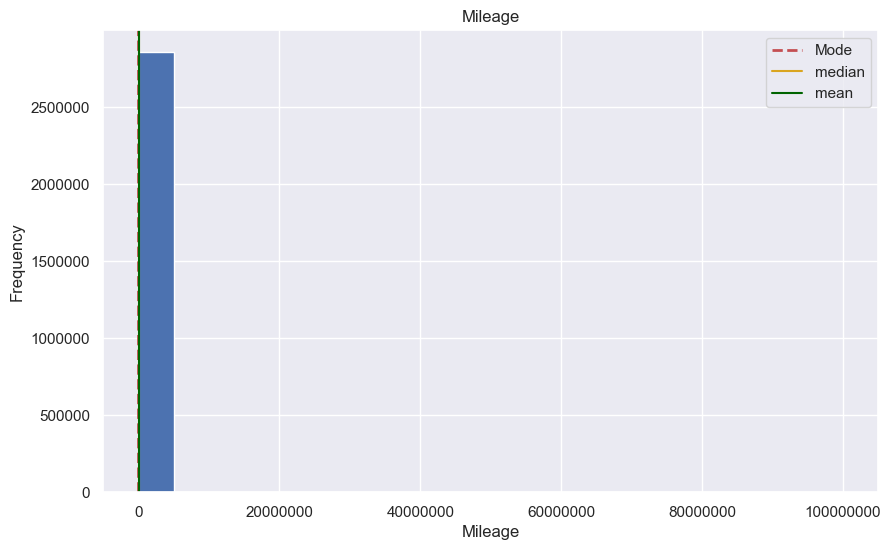

In [140]:
# plotting the mileage column to see the distribution
plt.figure(figsize=(10,6))
plt.hist(cars_df2['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(cars_df2['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

The graph shows us that there are a large amount of outliers in the column. So we will need to remove the outliers before we can fill in the null values with the mean or median value. We will use the interquartile range to remove the outliers. More information on this can be found on [https://www.statisticshowto.com/identify-outliers/](https://www.statisticshowto.com/identify-outliers/). 

This looks better. What we can tell from the graph is that the mileage of the vehicles fall within a range of approximately 0 to 100,000 miles. The maj

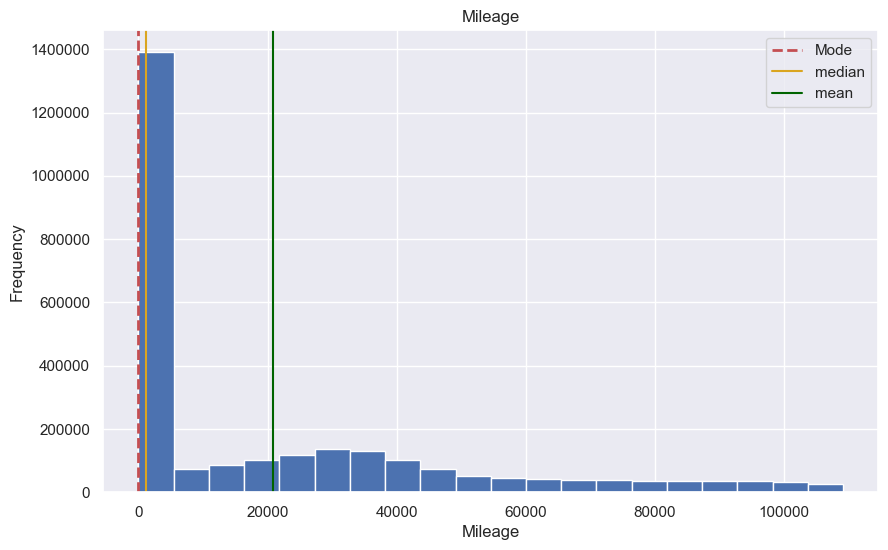

In [141]:
# using the interquartile range to remove outliers
q1 = cars_df2['mileage'].quantile(0.25)
q3 = cars_df2['mileage'].quantile(0.75)

# calculating the interquartile range
iqr = q3 - q1

# removing outliers
cars_df2 = cars_df2[(cars_df2['mileage'] >= q1 - 1.5*iqr) & (cars_df2['mileage'] <= q3 + 1.5*iqr)]

# checking the result
plt.figure(figsize=(10,6))
plt.hist(cars_df2['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(cars_df2['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

It looks like the majority of vehicles have a mileage of 0 miles. This is because the vehicles are new. So in this case, we can fill in the null values with the mean value of the column.

In [142]:
# filling the null values with the mean of the column
cars_df2['mileage'].fillna(cars_df2['mileage'].mean(), inplace=True)

# checking the result
result = cars_df2['mileage'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the mileage column are {result.round(2)}%.")

The amount of null values in the mileage column are 0.0%.


---

### **power**

Power is the power produced by the engine. This is a measurement of the power produced by the engine and the revolutions per minute (rpm). Since this is another measurement of the power the engine produces, we will not be using this column. We will drop this column from the dataset due to redundancy.

In [143]:
# dropping the column
cars_df2.drop('power', axis=1, inplace=True)

---

### **seller_rating**

The seller rating is the rating of the dealership that is selling the vehicle. This is a rating from 1 to 5 stars.

In [144]:
# checking the number of null values in the column
percentage = cars_df2['seller_rating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the seller_rating column are {percentage.round(2)}%.")

The amount of null values in the seller_rating column are 1.19%.


Lets take a look at the seller_rating column.

In [145]:
# checking the value_counts of the column
cars_df2['seller_rating'].value_counts()/cars_df2.shape[0]*100

5.000   6.001
4.000   4.075
4.500   3.536
4.667   2.058
4.333   2.018
         ... 
4.788   0.000
4.012   0.000
3.984   0.000
3.816   0.000
3.165   0.000
Name: seller_rating, Length: 1805, dtype: float64

Since this column represents the rating of the seller, we can replace the null values with the most common value of the column.

In [146]:
# filling the null values with the most frequent value.
cars_df2['seller_rating'].fillna("5", inplace=True)

# checking the result
result = cars_df2['seller_rating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the seller_rating column are {result.round(2)}%.")

The amount of null values in the seller_rating column are 0.0%.


Now that the column is cleaned, lets group the columns into 5 categories. This will help us reduce create a more accurate rating system.

In [147]:
# binning the column into 5 star ratings
cars_df2['seller_rating'] = cars_df2['seller_rating'].astype(int)
cars_df2['seller_rating'] = pd.cut(cars_df2['seller_rating'], bins=[0,1,2,3,4,5], labels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
 
# checking the result
cars_df2['seller_rating'].value_counts()

4 stars    1885877
3 stars     504774
5 stars     188722
2 stars      39014
1 star        7523
Name: seller_rating, dtype: int64

Lets take a look at the distribution of the seller_rating column.

<Figure size 1000x600 with 0 Axes>

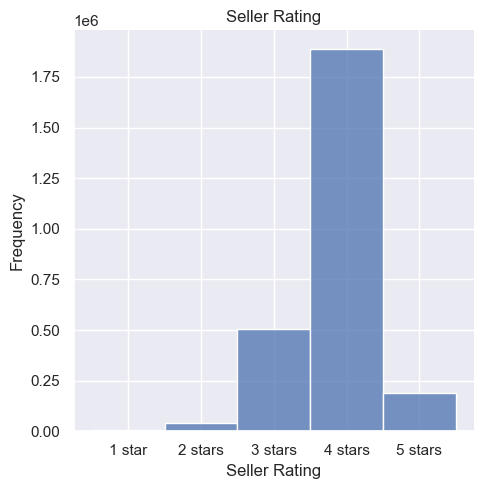

In [148]:
# plotting the column
plt.figure(figsize=(10,6))
sns.displot(cars_df2['seller_rating'], bins=5)
plt.title('Seller Rating')
plt.xlabel('Seller Rating')
plt.ylabel('Frequency')
plt.show()

We can see that the seller_rating column is heavily skewed to the right. This means that there are a large amount of 4 star ratings which tells us that most sellers have a high rating.

---

### **sp_id**

The service principal ID is set as a variable named SP_ID for use in additional command. This is not useful for our model because this acts as a unique identifier for the vehicle. We will drop this column from the dataset.

In [149]:
# dropping the column
cars_df2.drop(['sp_id'], axis=1, inplace=True)

---

### **torque**

Torque is the engine's rotational force and measures how much of that twisting force is available when an engine exerts itself.

In [150]:
# checking the number of null values in the column
percentage = cars_df2['torque'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the torque column are {percentage.round(2)}%.")

The amount of null values in the torque column are 17.52%.


This is a large amount of null values. Lets take a closer look.

In [151]:
# checking the value_counts of the column
cars_df2['torque'].value_counts()/cars_df2.shape[0]*100

383 lb-ft @ 4,100 RPM   3.095
400 lb-ft @ 4,500 RPM   2.361
410 lb-ft @ 3,950 RPM   2.011
148 lb-ft @ 200 RPM     1.920
132 lb-ft @ 4,500 RPM   1.858
                         ... 
210 lb-ft @ 3,900 RPM   0.000
195 lb-ft @ 2,000 RPM   0.000
378 lb-ft @ 3,050 RPM   0.000
142 lb-ft @ 4,500 RPM   0.000
156 lb-ft @ 4,500 RPM   0.000
Name: torque, Length: 1925, dtype: float64

We can separate the torque from this column and find the average value. But first, we will need to clean the column further.

In [152]:
# splitting the column and returning the first value
cars_df2['torque'] = cars_df2['torque'].str.split(" ").str[0]

# converting the column to float.
cars_df2['torque'] = cars_df2['torque'].astype(float)

Now that the column is cleaned, lets get a visual representation. This will help us determine if we can fill in the null values with a mean or median value.

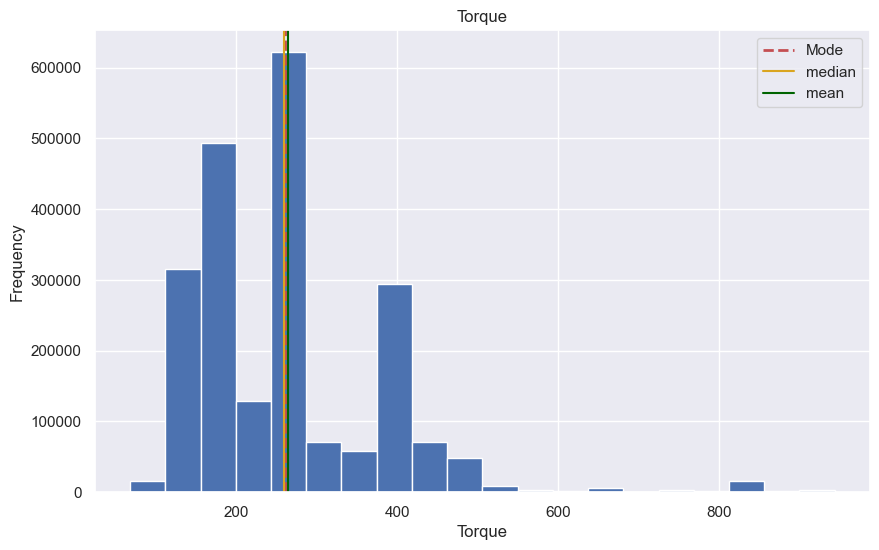

In [153]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['torque'], bins=20)
plt.title('Torque')
# Add the mode
plt.axvline(cars_df2['torque'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['torque'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['torque'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.show()

The graph shows us that there is a majority of vehicles have a torque of 383 lb-ft.

In this case, we can fill in the null values with the mean value of the column.

In [154]:
# filling the null values with the mean of the column.
cars_df2['torque'].fillna(cars_df2['torque'].mean(), inplace=True)

# checking the result
result = cars_df2['torque'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the torque column are {result.round(2)}%.")

The amount of null values in the torque column are 0.0%.


---

### **transmission**

The transmission is the type of transmission the vehicle has.

In [155]:
# checking how many null values are in the column
percentage = cars_df2['transmission'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the transmission column are {percentage.round(2)}%.")


The amount of null values in the transmission column are 2.09%.


Let's take a closer look at the transmission column.

In [156]:
# checking the value_counts of the column
cars_df2['transmission'].value_counts()/cars_df2.shape[0]*100

A             80.066
CVT           15.987
M              1.477
Dual Clutch    0.379
Name: transmission, dtype: float64

In [157]:
# checking for unique values in the column
cars_df2['transmission'].unique()

array(['A', 'CVT', 'M', nan, 'Dual Clutch'], dtype=object)

The automatic transmission is the most common type of transmission. So we can replace the null values with the most common value of the column.

In [158]:
# filling the null values with "A", for Automatic transmission.
cars_df2['transmission'].fillna("A", inplace=True)

# checking the result
result = cars_df2['transmission'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the transmission column are {result.round(2)}%.")

The amount of null values in the transmission column are 0.0%.


---

### **transmission_display**

The transmission display also represents the type of transmission the vehicle has. This is a more detailed version of the transmission column. Since we already have the transmission column, we will drop this column from the dataset.

In [159]:
# dropping the transmission_display
cars_df2.drop(['transmission_display'], axis=1, inplace=True)

---

### **trimId**

The trimId is the trim Id of the vehicle. This is another unique identifier for the vehicle that is redundant. We will drop this column from the dataset.

In [160]:
# dropping the column
cars_df2.drop(['trimId'], axis=1, inplace=True)

---

### **trim_name**

The trim name is the name of the trim of the vehicle. This is another unique identifier for the vehicle that is redundant. We will drop this column from the dataset.

In [161]:
# dropping the column
cars_df2.drop(['trim_name'], axis=1, inplace=True)

---

### **wheel_system**

The wheel system represents the how to power of the engine is transmitted to the wheels.

In [162]:
# checking the number of null values in the column
percentage = cars_df2['wheel_system'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheel_system column are {percentage}%.")

The amount of null values in the wheel_system column are 4.734358755631382%.


Let's take a closer look at the wheel_system column.

In [163]:
# checking the value_counts of the column
cars_df2['wheel_system'].value_counts()/cars_df2.shape[0]*100

FWD   42.348
AWD   23.759
4WD   19.034
RWD    6.198
4X2    3.926
Name: wheel_system, dtype: float64

In [164]:
# checking the unique values of the column
cars_df2['wheel_system'].unique()

array(['FWD', 'AWD', 'RWD', '4WD', nan, '4X2'], dtype=object)

In this case, we can replace the null values with the most common value of the column.

In [165]:
# replacing the null values with "FWD".
cars_df2['wheel_system'].fillna("FWD", inplace=True)

# checking the result
result = cars_df2['wheel_system'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheel_system column are {result.round(2)}%.")

The amount of null values in the wheel_system column are 0.0%.


Great! We have successfully cleaned the wheel_system column.

---

### **wheel_system_display**

The wheel system display is anothe representation of the wheel system column. This is redundant information because we already have the wheel_system column. So we can drop this column.

In [166]:
cars_df2['wheel_system_display'].value_counts()

Front-Wheel Drive    1112022
All-Wheel Drive       623902
Four-Wheel Drive      499817
Rear-Wheel Drive      162751
4X2                   103098
Name: wheel_system_display, dtype: int64

In [167]:
# dropping the column
cars_df2.drop(['wheel_system_display'], axis=1, inplace=True)

---

### **wheelbase**

The wheelbase is the distance between the front and rear axles of the vehicle.

In [168]:
# checking the number of null values in the column
percentage = cars_df2['wheelbase'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheelbase column are {percentage.round(2)}%.")

The amount of null values in the wheelbase column are 4.99%.


With this many null values, we need to take a closer look.

In [169]:
# checking the value_counts of the column
cars_df2['wheelbase'].value_counts()/cars_df2.shape[0]*100

106.3 in   6.740
112.2 in   4.488
145 in     3.195
105.1 in   3.014
111.2 in   2.908
            ... 
156.4 in   0.000
130.9 in   0.000
170 in     0.000
96.4 in    0.000
138.4 in   0.000
Name: wheelbase, Length: 470, dtype: float64

In [170]:
# checking the unique values of the column
cars_df2['wheelbase'].unique()

array(['101.2 in', '107.9 in', '115 in', '113.1 in', '107.3 in',
       '105.6 in', '93.7 in', '110.6 in', '106.2 in', '106.3 in',
       '111.4 in', '107.5 in', '120.9 in', '118.9 in', '114.8 in',
       '103.7 in', nan, '104.3 in', '109.4 in', '108 in', '108.9 in',
       '112.5 in', '115.1 in', '116 in', '119.8 in', '118.4 in',
       '120.2 in', '143.5 in', '105.9 in', '109.8 in', '120.4 in',
       '110.4 in', '112.8 in', '122.5 in', '108.1 in', '114.7 in',
       '105.1 in', '121.6 in', '106.5 in', '130 in', '110.7 in',
       '105.7 in', '100.6 in', '111.2 in', '109.3 in', '102.5 in',
       '119 in', '103.8 in', '159.8 in', '140.5 in', '114.2 in',
       '115.3 in', '112.7 in', '110.5 in', '144.6 in', '107.1 in',
       '147.4 in', '115.5 in', '116.2 in', '111.7 in', '114 in',
       '147.5 in', '108.5 in', '116.9 in', '153.7 in', '121.2 in',
       '126.4 in', '113.2 in', '111.8 in', '104.2 in', '114.9 in',
       '121.1 in', '144.3 in', '111 in', '128.3 in', '113.8 in',
     

Let begin by cleaning the column from special characters, units, and converting the column to a float.

In [171]:
# splitting the column and returning the first value
cars_df2['wheelbase'] = cars_df2['wheelbase'].str.split(" ").str[0]

# replacing "--" with a null value.
cars_df2['wheelbase'].replace("--", np.nan, inplace=True)

# converting the column to float.
cars_df2['wheelbase'] = cars_df2['wheelbase'].astype(float)

Now that the column is cleaned, lets get a visual representation. This will help us determine if we can fill in the null values with a mean or median value.

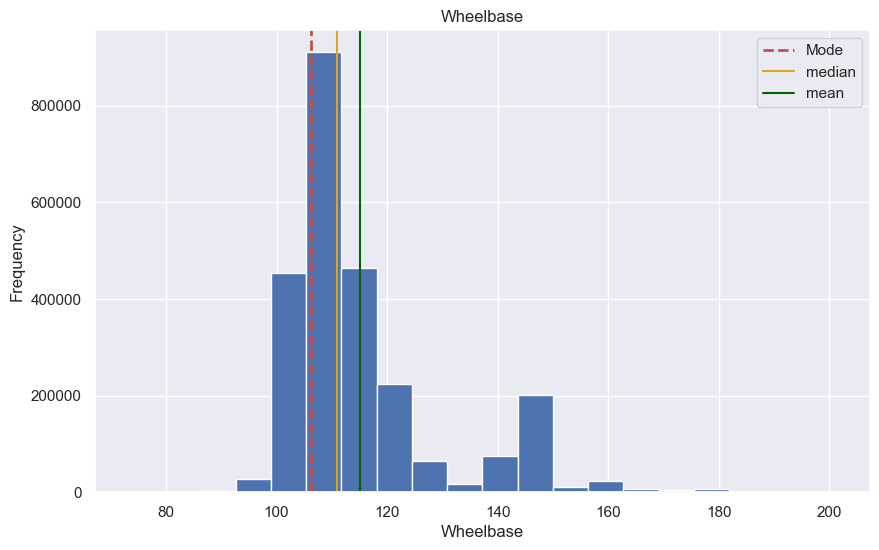

In [172]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['wheelbase'], bins=20)
plt.title('Wheelbase')
# Add the mode
plt.axvline(cars_df2['wheelbase'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['wheelbase'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['wheelbase'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Wheelbase')
plt.ylabel('Frequency')
plt.show()

With a wide range of values, we can see that the majority of vehicles have a wheelbase of 112 inches. So we can fill in the null values with the median value of the column.

In [173]:
# filling the null values with the median of the column.
cars_df2['wheelbase'].fillna(cars_df2['wheelbase'].median(), inplace=True)

# checking the result
result = cars_df2['wheelbase'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheelbase column are {result.round(2)}%.")

The amount of null values in the wheelbase column are 0.0%.


---

### **width**

The width is the width of the vehicle. This is measured in inches.

In [174]:
# checking how many null values are in the column
percentage = cars_df2['width'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the width column are {percentage.round(2)}%.")

The amount of null values in the width column are 4.99%.


Lets take a closer look at the width column.

In [175]:
# checking the value_counts of the column
cars_df2['width'].value_counts()/cars_df2.shape[0]*100

72.4 in   4.670
73 in     3.749
96.8 in   3.671
83.5 in   2.582
70.9 in   2.535
           ... 
63.8 in   0.000
62 in     0.000
63.7 in   0.000
65.2 in   0.000
65.1 in   0.000
Name: width, Length: 280, dtype: float64

In [176]:
# checking the unique values of the column
cars_df2['width'].unique()

array(['79.6 in', '85.6 in', '87.4 in', '84.4 in', '70.7 in', '82.7 in',
       '73.5 in', '80 in', '69.6 in', '83.3 in', '70.9 in', '73 in',
       '81.5 in', '78.6 in', '78.5 in', '84.8 in', '71.4 in', nan,
       '83.5 in', '73.6 in', '72.5 in', '82.8 in', '85.5 in', '73.8 in',
       '72.6 in', '75 in', '70.8 in', '74.6 in', '82.5 in', '73.2 in',
       '90.2 in', '93.8 in', '81.3 in', '71.8 in', '84.3 in', '80.5 in',
       '72.8 in', '78.1 in', '90.4 in', '72.4 in', '74.7 in', '69.9 in',
       '70.5 in', '73.7 in', '71.2 in', '82.9 in', '105.9 in', '83.9 in',
       '77.2 in', '77.5 in', '76.7 in', '74.4 in', '75.2 in', '82.1 in',
       '81.9 in', '81.2 in', '86.5 in', '85.4 in', '85.2 in', '79.4 in',
       '79.9 in', '69 in', '88.5 in', '86.4 in', '72 in', '82.6 in',
       '84 in', '79.5 in', '72.3 in', '78.9 in', '73.4 in', '83.2 in',
       '79.3 in', '69.2 in', '83.7 in', '72.9 in', '82.2 in', '81.1 in',
       '96 in', '76.3 in', '72.2 in', '82.3 in', '70.4 in', '80.3 in

Just like the length column, lets clean the column from special characters, units, and converting the column to a float.

In [177]:
# splitting the column and returning the first value
cars_df2['width'] = cars_df2['width'].str.split(" ").str[0]

# replacing "--" with a null value.
cars_df2['width'].replace("--", np.nan, inplace=True)

# converting the column to float.
cars_df2['width'] = cars_df2['width'].astype(float)

Now that the column is cleaned, lets get a visual representation. This will help us determine if we can fill in the null values with a mean or median value.

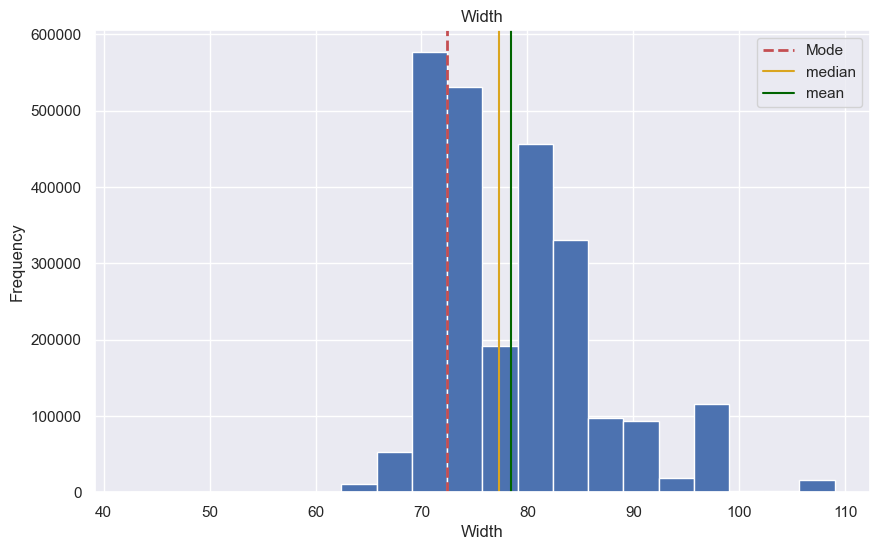

In [178]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['width'], bins=20)
plt.title('Width')
# Add the mode
plt.axvline(cars_df2['width'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['width'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['width'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

Just like the length column, we can see that the majority of vehicles have a width of 75 inches. So we can fill in the null values with the mode value of the column.

In [179]:
# filling the null values with the mode of the column.
cars_df2['width'].fillna(cars_df2['width'].mode()[0], inplace=True)

# checking the result
result = cars_df2['width'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the width column are {result.round(2)}%.")

The amount of null values in the width column are 0.0%.


Lets take a look if there are any null values left in the dataset.

In [180]:
# checking how many null values are remaining in the dataset
cars_df2.isna().sum()

body_type                0
city                     0
daysonmarket             0
dealer_zip               0
engine_type              0
exterior_color           0
has_incidents            0
franchise_dealer         0
fuel_tank_volume         0
fuel_type                0
height                   0
horsepower               0
interior_color           0
is_new                   0
latitude                 0
length                   0
listed_date              0
listing_color            0
listing_id               0
longitude                0
make_name                0
maximum_seating          0
mileage                  0
model_name               0
price                    0
savings_amount           0
seller_rating            0
sp_name                  0
torque                   0
transmission             0
wheel_system             0
wheelbase                0
width                    0
year                     0
combined_fuel_economy    0
legroom                  0
major_options_count      0
d

Fantastic! We have successfully cleaned the Null values in the dataset. 

---

## **Other Categorical Columns**

Now that we have cleaned the missing values in the dataset, let's see if we can make use of any of the features that we haven't gone over yet.

In [181]:
# checking for non-numerical columns
cars_df2.select_dtypes(exclude=np.number).columns

Index(['body_type', 'city', 'dealer_zip', 'engine_type', 'exterior_color',
       'has_incidents', 'franchise_dealer', 'fuel_type', 'interior_color',
       'is_new', 'listed_date', 'listing_color', 'make_name', 'model_name',
       'seller_rating', 'sp_name', 'transmission', 'wheel_system'],
      dtype='object')

We will also go through columns that we haven't gone through yet and see if there is anything we can do with them.

---

### **city**

The city is the city where the vehicle is located. We can drop this column because we already have the dealer_zip column. The dealer_zip column is more useful because it is a numeric column and we can use it to find the state where the vehicle is located.

In [182]:
# dropping the column due to redundancy
cars_df2.drop(['city'], axis=1, inplace=True)

---

### **dealer_zip**

The dealer zip is the zip code of the dealer. A better way to represent this column is to extract the state from the zip code. This will allow us to use the state column in our model. We will drop the dealer_zip column and keep the state column instead.

In [183]:
cars_df2['dealer_zip'].info()

<class 'pandas.core.series.Series'>
Index: 2625910 entries, ZACNJABB5KPJ92081 to JN8AT2MT1HW400805
Series name: dealer_zip
Non-Null Count    Dtype 
--------------    ----- 
2625910 non-null  object
dtypes: object(1)
memory usage: 40.1+ MB


We can use the zip code to extract the state. 

Note: In order to run this code, you will need to install the Zipcodes package. You can install the package by running the following command in your terminal.

    pip install zipcodes

In [184]:
import zipcodes
from pprint import pprint

# creating a function to return the state of the zip code
def get_state(zip_code):
    try:
        return zipcodes.matching(zip_code)[0]['state']
    except:
        return np.nan
    
# applying the function to the column
cars_df2['dealer_state'] = cars_df2['dealer_zip'].apply(get_state)
 
# checking the result
cars_df2['dealer_state'].value_counts()


PA    4158
NJ    3759
NY    3561
IL    2329
MD    2029
CT    1840
IN    1204
MI    1067
MA     761
DE     300
OH     121
TX     108
CA     100
FL      64
GA      41
VA      36
OK      32
WA      27
NH      26
WI      26
CO      25
NC      23
MO      23
MN      21
AZ      20
SC      17
KY      16
OR      15
UT      14
IA      13
NV      11
KS      10
NE       9
TN       9
ID       7
AL       7
LA       6
MS       5
HI       5
NM       4
SD       4
WV       3
AR       3
MT       2
VT       2
ME       2
ND       1
Name: dealer_state, dtype: int64

Great! We have successfully extracted the state from the dealer_zip column. Now lets group the states into regions and drop the state and dealer_zip columns.

In [185]:
# grouping the states by region
region_dict = {'CA': 'West', 'TX': 'South', 'FL': 'South', 'NY': 'Northeast',
               'PA': 'Northeast', 'IL': 'Midwest', 'OH': 'Midwest', 'GA': 'South', 'NC': 'South'
               , 'MI': 'Midwest', 'NJ': 'Northeast', 'VA': 'South', 'WA': 'West', 'AZ': 'West',
               'MA': 'Northeast', 'TN': 'South', 'IN': 'Midwest', 'MO': 'Midwest', 'MD': 'South', 
               'CO': 'West', 'MN': 'Midwest', 'SC': 'South', 'AL': 'South', 'LA': 'South', 'WI': 'Midwest',
               'OR': 'West', 'KY': 'South', 'OK': 'South', 'CT': 'Northeast', 'IA': 'Midwest', 'NV': 'West',
               'UT': 'West', 'AR': 'South', 'MS': 'South', 'KS': 'Midwest', 'NM': 'West', 'NE': 'Midwest',
               'NH': 'Northeast', 'ID': 'West', 'ME': 'Northeast', 'RI': 'Northeast', 'WV': 'South', 'MT': 'West',
               'DE': 'South', 'AK': 'West', 'DC': 'South', 'ND': 'Midwest', 'SD': 'Midwest', 'VT': 'Northeast',
               'WY': 'West', 'HI': 'West', 'PR': 'South', 'GU': 'West', 'VI': 'South', 'MP': 'West', 'AS': 'South',
               'FM': 'West', 'MH': 'West', 'PW': 'West', 'AA': 'South', 'AE': 'South', 'AP': 'South'}

# mapping the dictionary to the column
cars_df2['dealer_region'] = cars_df2['dealer_state'].map(region_dict) 
 
# checking the result
cars_df2['dealer_region'].value_counts()

Northeast    14109
Midwest       4828
South         2699
West           230
Name: dealer_region, dtype: int64

Now that we have grouped the states into regions, we can drop the state and dealer_zip columns.

In [186]:
# dropping the columns
cars_df2.drop(['dealer_zip', 'dealer_state'], axis=1, inplace=True)

---

### **franchise_dealer**

The franchise dealer is a boolean value that represents if the dealer is a franchise dealer or not. We can simply drop this column because we already have the seller_rating column. The seller_rating column is more useful because it is a numeric column and we can use it to determine if the dealer is a franchise dealer or not.

In [187]:
# dropping the column
cars_df2.drop(['franchise_dealer'], axis=1, inplace=True)

---

### **is_new**

The is new column is a boolean value that represents if the vehicle is new or not. This is a redundant column because we already have the mileage column, which already tells us if the vehicle is new or not. We will drop this column.

In [188]:
# dropping the column
cars_df2.drop(['is_new'], axis=1, inplace=True)

---

### **listed_date**

The listed date is the date the vehicle was listed. We can drop this column because we already have the year column. The year column is more useful because it is a numeric column and we can use it to find the age of the vehicle.

In [189]:
# dropping the column
cars_df2.drop(['listed_date'], axis=1, inplace=True)

---

### **listing_color**

The listing color is the color of the vehicle when it was listed. We do not want to use the listing_color column because it is the color of the vehicle when it was first listed. This is not useful for our model because the vehicle may have been re-painted since it was listed. So we will drop this column.

In [190]:
# dropping the column
cars_df2.drop(['listing_color'], axis=1, inplace=True)

---

### **make_name**

The make name is the name of the make of the vehicle. Lets take a closer look at the make_name column and see how we can use it in our model.

In [191]:
# checking the value_counts of the column
top_20 = cars_df2['make_name'].value_counts()
top_20

Ford         414684
Chevrolet    324028
Toyota       201057
Nissan       196380
Honda        184584
              ...  
Hudson            1
Austin            1
Daewoo            1
Edsel             1
Rover             1
Name: make_name, Length: 97, dtype: int64

In [192]:
# checking the number of unique values in the column
cars_df2['make_name'].nunique()

97

in order to cut the number of unique values in the make_name column, we will list the top 20 most common values and replace the rest with the value 'Other'.

In [193]:
# creating a list of the top 20 makes
top_20 = top_20[:20].index
 
# creating a function to return the top 20 makes
def top_20_make(make):
    if make in top_20:
        return make
    else:
        return 'Other'
    
# applying the function to the column
cars_df2['make_name'] = cars_df2['make_name'].apply(top_20_make)
 
# checking the result
cars_df2['make_name'].value_counts()

Ford             414684
Chevrolet        324028
Other            216091
Toyota           201057
Nissan           196380
Honda            184584
Jeep             150288
Hyundai          123044
Kia              101601
RAM               91638
GMC               83493
Dodge             76784
Volkswagen        67843
Subaru            62093
Mercedes-Benz     60738
Buick             58140
BMW               55901
Mazda             46690
Cadillac          42618
Lexus             34323
Audi              33892
Name: make_name, dtype: int64

It looks like the top 3 most common values are Ford, Chevrolet, and Toyota. These are the types of vehicles that are most likely to be sold.

---

### **model_name**

The model name is the name of the model of the vehicle. Lets take a closer look at the model_name column and see how we can use it in our model.

In [194]:
# checking the value_counts of the column
cars_df2['model_name'].value_counts()

F-150              111982
1500                62389
Silverado 1500      62291
Equinox             56645
Escape              51151
                    ...  
959                     1
95                      1
550 Spyder              1
Stag                    1
C/K 1000 Series         1
Name: model_name, Length: 1359, dtype: int64

In [195]:
# checking the number of unique values in the column
cars_df2['model_name'].nunique()

1359

Like our make_name column, we will list the top 20 most common values and replace the rest with the value 'Other'. This will reduce the number of unique values in the model_name column.

In [196]:
# instantiating the value counts
top_20 = cars_df2['model_name'].value_counts()

# creating a list of the top 20 models
top_20 = top_20[:20].index
 
# creating a function to return the top 20 models
def top_20_model(model):
    if model in top_20:
        return model
    else:
        return 'Other'
     
# applying the function to the column
cars_df2['model_name'] = cars_df2['model_name'].apply(top_20_model)

Great! We have successfully reduced the number of unique values in the model_name column.

Lets take a look at the top 20 most common values in the model_name column.

In [197]:
# checking the result
cars_df2['model_name'].value_counts()

Other             1761339
F-150              111982
1500                62389
Silverado 1500      62291
Equinox             56645
Escape              51151
Rogue               45284
Explorer            42879
Grand Cherokee      39609
Fusion              38003
Camry               37311
CR-V                37091
Trax                34789
Altima              34783
Civic               33728
Accord              32738
Corolla             32295
Cherokee            29566
Tucson              27853
Malibu              27204
RAV4                26980
Name: model_name, dtype: int64

---

### **sp_name**

The sp name is the name of the dealership selling the vehicle. We can drop this column because the sp name is not useful for our model.

In [198]:
# dropping the column
cars_df2.drop(['sp_name'], axis=1, inplace=True)

Now lets look at our target column.

---

### **longitude and latitude**

The longitude and latitude columns are the coordinates of where the vehicle is located. We can drop these columns because we already have the dealer_state column. This would be redundant information.

In [199]:
# dropping the longitude and latitude columns
cars_df2.drop(['longitude', 'latitude'], axis=1, inplace=True)

---

### **listing_id**

The listing id is the unique identifier for the vehicle. We can drop this column because it is not useful for our model.

In [200]:
# dropping the listing_id column
cars_df2.drop(['listing_id'], axis=1, inplace=True)

---

## **size_of_vehicle**

We will be creating a new column called size_of_vehicle. This column will be a numeric column that represents the size of the vehicle. We will use the length, width, height, and wheelbase columns to calculate the size of the vehicle. 

We will use the following formula to calculate the size of the vehicle.

    size_of_vehicle = length + width + height + wheelbase + fuel_tank_volume

This will allow us to reduce the number of columns in our dataset, while still being able to use the size of the vehicle in our model.

In [201]:
# creating a new column called 'size_of_vehicle' from the 'length', 'width', 'height', 'wheelbase' and 'fuel_tank_volume' columns
cars_df2['size_of_vehicle'] = cars_df2['length'] + cars_df2['width'] + cars_df2['height'] + cars_df2['wheelbase'] + cars_df2['fuel_tank_volume']

# dropping the 'length', 'width', 'height', and 'wheelbase' columns
cars_df2.drop(['length', 'width', 'height', 'wheelbase', 'fuel_tank_volume'], axis=1, inplace=True)

# checking the result
cars_df2.head()

,body_type,daysonmarket,engine_type,exterior_color,has_incidents,fuel_type,horsepower,interior_color,make_name,maximum_seating,...,seller_rating,torque,transmission,wheel_system,year,combined_fuel_economy,legroom,major_options_count,dealer_region,size_of_vehicle
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,SUV / Crossover,522,I4,Yellow,False,Gasoline,177.000,Black,Jeep,5,...,2 stars,200.000,A,FWD,2019,26.083,76.300,1.000,NaN,426.600
SALCJ2FX1LH858117,SUV / Crossover,207,I4,Black,False,Gasoline,246.000,Black,Other,7,...,3 stars,269.000,A,AWD,2020,26.083,77.200,1.000,NaN,460.200
SALRR2RV0L2433391,SUV / Crossover,196,V6,Gray,False,Gasoline,340.000,Gray,Other,7,...,3 stars,332.000,A,AWD,2020,26.083,76.600,6.161,NaN,494.000
SALCJ2FXXLH862327,SUV / Crossover,137,I4,Black,False,Gasoline,246.000,Black,Other,7,...,3 stars,269.000,A,AWD,2020,26.083,77.200,1.000,NaN,460.200
SALYK2EX1LA261711,SUV / Crossover,242,I4,Other Color,False,Gasoline,247.000,Brown,Other,5,...,3 stars,269.000,A,AWD,2020,26.083,77.300,8.000,NaN,469.300


Lets take a look at the distribution of the size_of_vehicle column.

C:\Users\robby\AppData\Local\Temp\ipykernel_13908\1077592063.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df2['size_of_vehicle'])


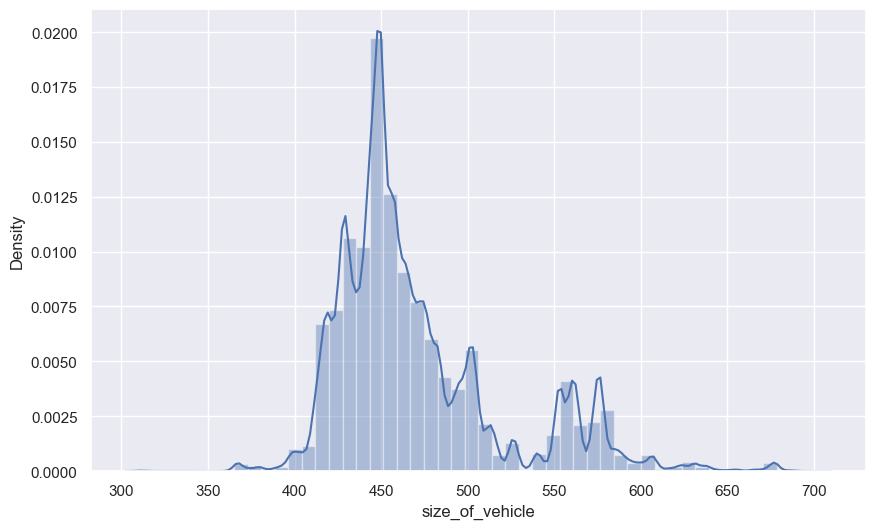

The mean of the size_of_vehicle column is 470.31985139238276.
The median of the size_of_vehicle column is 456.4999931335449.


In [202]:
# plotting the distribution of the column
plt.figure(figsize=(10, 6))
sns.distplot(cars_df2['size_of_vehicle'])
plt.show()

# checking the mean and median of the column
print(f"The mean of the size_of_vehicle column is {cars_df2['size_of_vehicle'].mean()}.")
print(f"The median of the size_of_vehicle column is {cars_df2['size_of_vehicle'].median()}.")

As we can see, most vehicles have a size of 439-450 inches.

---

### **Target Variable - price**

Target | Description | Data Type
---|----------------------------|----------
`price` | The price of the vehicle. This will be the target variable for the model. | Continuous

Since the target variable is continuous, this will be a regression problem. This will help us determine which regression model will be the best fit for the data. The regression models we will be using are:

Lets take a look at the distribution of the price column and see what we can learn from it.

In [203]:
cars_df2['price'].describe()

count   2625910.000
mean      31302.497
std       19331.885
min         256.000
25%       19922.000
50%       27495.000
75%       39047.000
max     3299995.000
Name: price, dtype: float64

We can see the the most expensive vehicle is $over 3 million, the average price of a vehicle is $31302.497, and the cheapest vehicle is $256.

In [204]:
# checking the value_counts of the column
cars_df2['price'].value_counts()

16995.000    6524
17995.000    6338
19995.000    6322
15995.000    6252
14995.000    6186
             ... 
81036.000       1
85231.000       1
63576.000       1
76338.000       1
73108.000       1
Name: price, Length: 85492, dtype: int64

There maybe a lot of outliers in the price column. Lets plot a boxplot to see if there are any outliers.

C:\Users\robby\AppData\Local\Temp\ipykernel_13908\3531268547.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df2['price'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


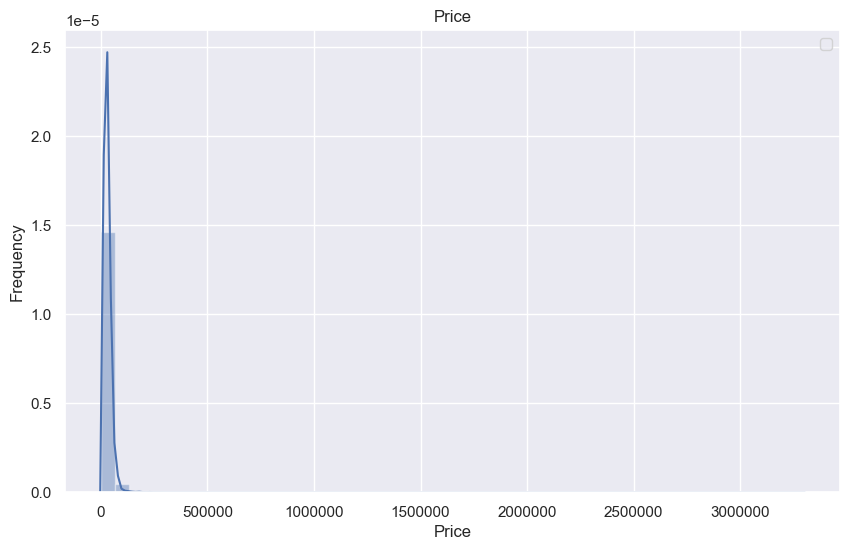

In [205]:
# plotting a histogram of the column
plt.figure(figsize=(10,6))
sns.distplot(cars_df2['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

The graph shows that our target variable is right skewed. This means that the majority of the values are clustered on the left side of the graph. This is not ideal for our model because it will be biased towards the lower values. We will need to transform the target variable to make it more normal.

C:\Users\robby\AppData\Local\Temp\ipykernel_13908\2605116485.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df2['price'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


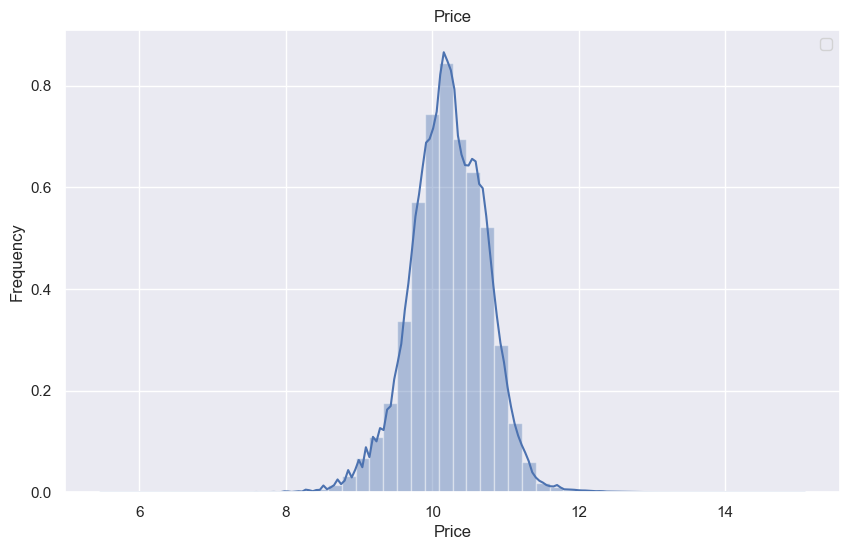

In [206]:
# normalizing the price column
cars_df2['price'] = np.log(cars_df2['price'])

# plotting the distribution of the price column
plt.figure(figsize=(10,6))
sns.distplot(cars_df2['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

This looks much better. We can see that the distribution is more normal. This will help our model make better predictions.

---

Now that we have gone through all of the columns in the dataset, we can begin to explore the data.

But before we do that, we need to save our cleaned dataset.

In [207]:
# saving the dataset
cars_df2.to_csv('cleaned_dataset_1.csv', index=True)

In [208]:
# checking the shape of the dataset
cars_df2.shape

(2625910, 24)

In [211]:
# importing the dataset
cars_df2 = pd.read_csv('cleaned_dataset_1.csv', index_col='vin')

# checking the shape of the dataset
cars_df2.shape

C:\Users\robby\AppData\Local\Temp\ipykernel_13908\1302587466.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  cars_df2 = pd.read_csv('cleaned_dataset_1.csv', index_col='vin')


(2625910, 24)

---

## **Exploratory Data Analysis**

Now that we have cleaned the dataset and transformed the target variable, we can begin our exploratory data analysis.
We will re-visit our questions of interest and see if we can answer them with our exploratory data analysis.

1. Why is the price of a vehicle different from other vehicles?
2. What features are important to predicting the price of a vehicle?
3. What is the relationship between the price of a vehicle and other features? 

Let's start by looking at the categorical columns.

In [212]:
# checking how many categorical columns are in the dataframe
cars_df2.select_dtypes(include='object').nunique()

body_type          9
engine_type       18
exterior_color    14
fuel_type          8
interior_color    15
make_name         21
model_name        21
seller_rating      5
transmission       4
wheel_system       5
dealer_region      4
dtype: int64

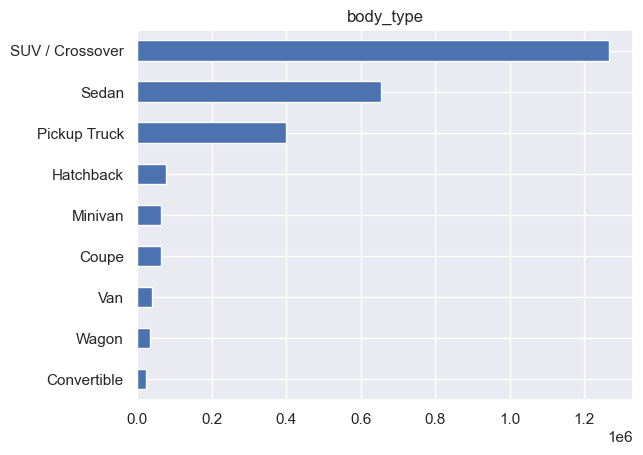

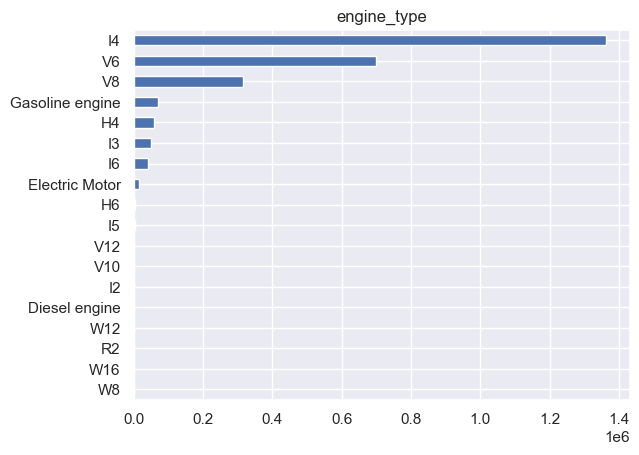

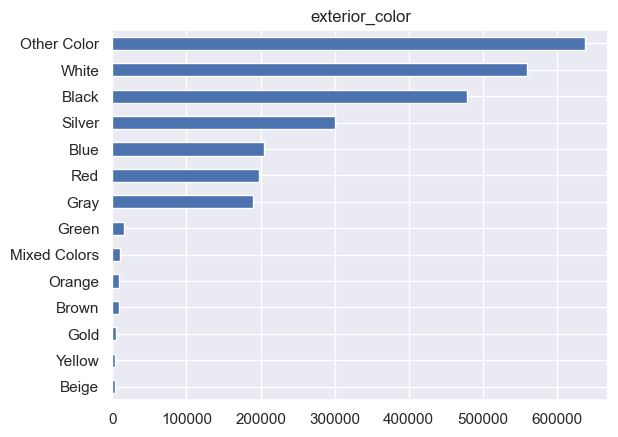

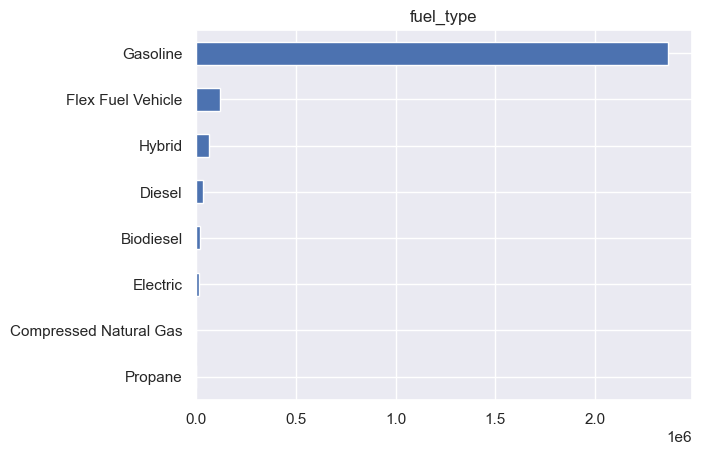

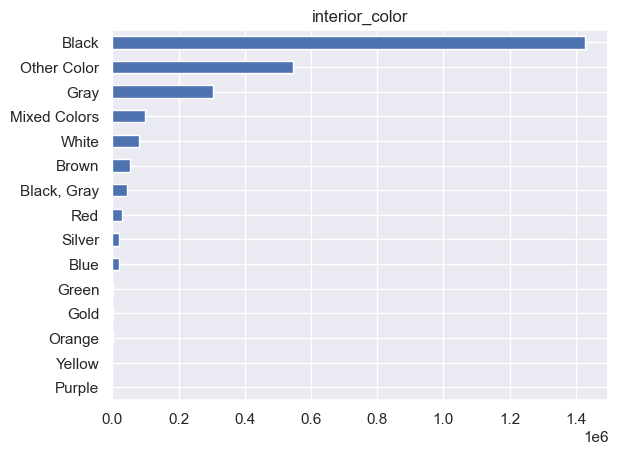

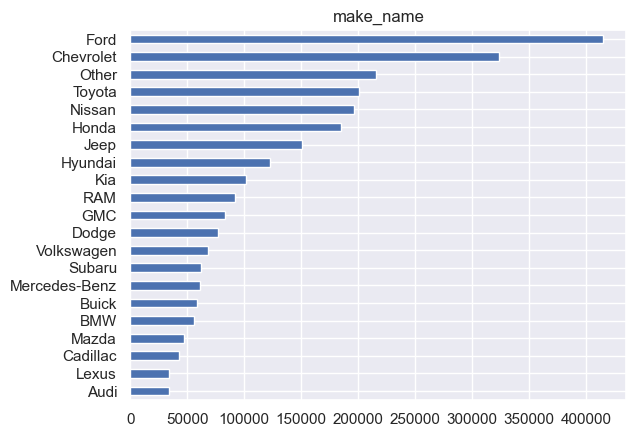

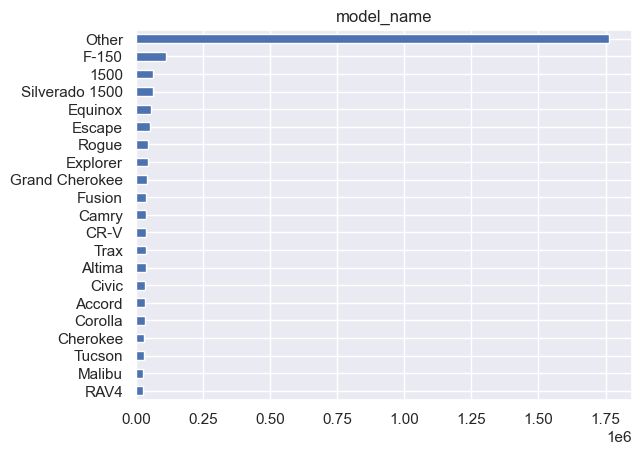

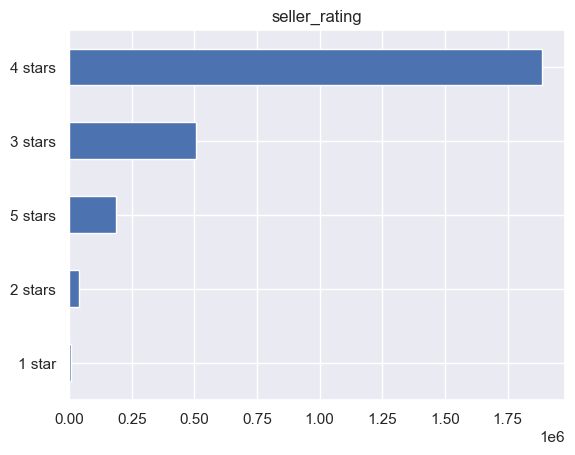

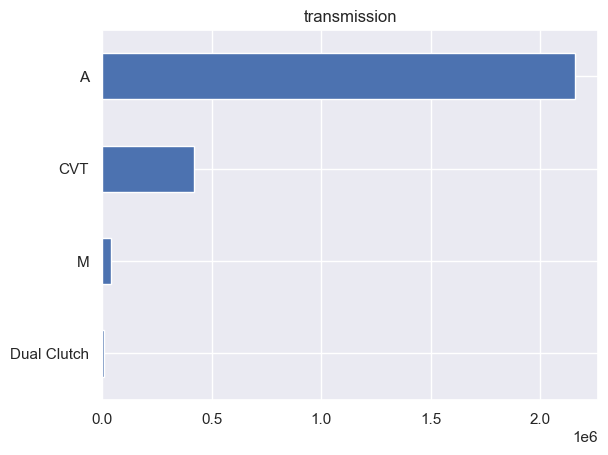

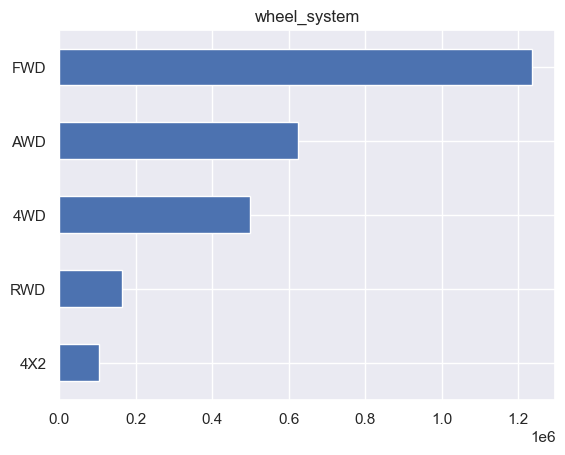

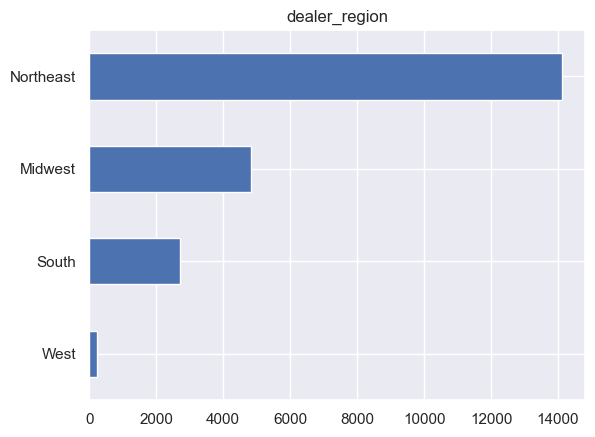

In [213]:
# Pull out the categorical variables
categorical_df = cars_df2.select_dtypes('object')

# Iterate column by column
for column in categorical_df:
    
    # Do Something
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.title(column)
    plt.show()

**Observations:**

1. The top 3 body types are SUV / Crossover, Sedan, and Pickup Truck.
2. The top 3 engine types are I4, V6, and V8.
3. Top 3 exterior colors are White, Black, and Silver.
4. Top 3 fuel types are Gasoline, Flex Fuel, and Hybrid.
5. Top 3 interior colors are Black, Gray, and White.
6. Top 3 makes are Ford, Chevrolet, and Toyota.
7. Top 3 models are F-150, Silverado 1500, and F-250.
8. Most seller ratings are between 3 and 4.
9. Most common wheel systems are FWD and AWD.
10. Most vehicles are located in the Northeast region.
11. Most common transmission types are Automatic and CVT.

Now lets look at the numerical columns.

In [214]:
# checking how many numerical columns are in the dataframe
cars_df2.select_dtypes(exclude='object').nunique()

daysonmarket               1571
has_incidents                 2
horsepower                  448
maximum_seating              11
mileage                  108997
price                     85492
savings_amount            10697
torque                      409
year                         96
combined_fuel_economy       166
legroom                     336
major_options_count          54
size_of_vehicle            5786
dtype: int64

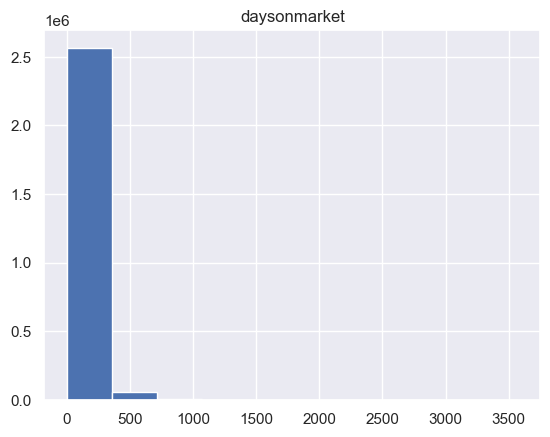

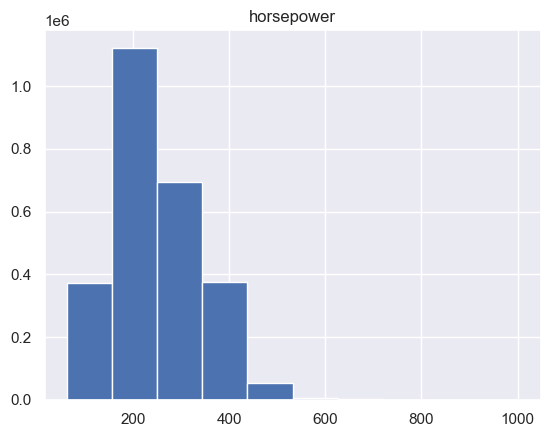

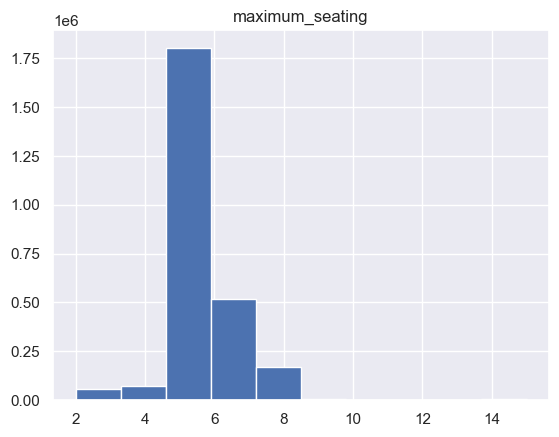

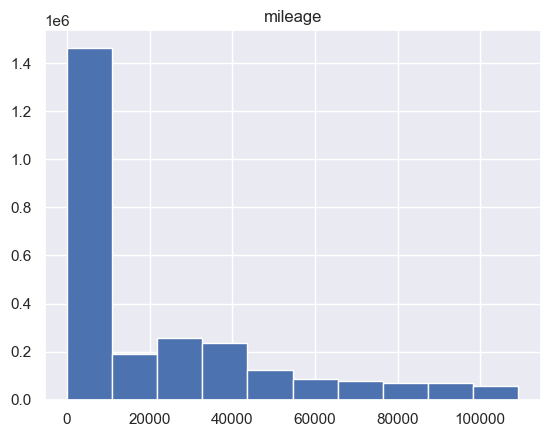

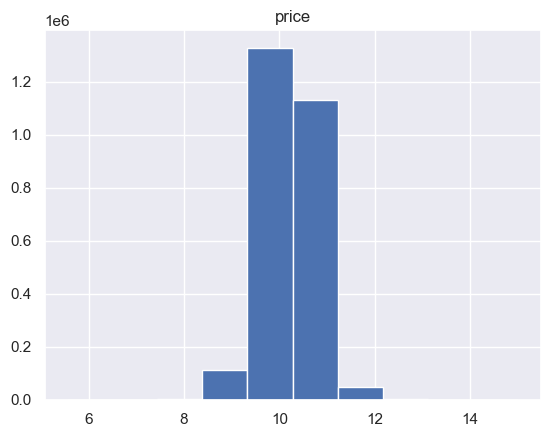

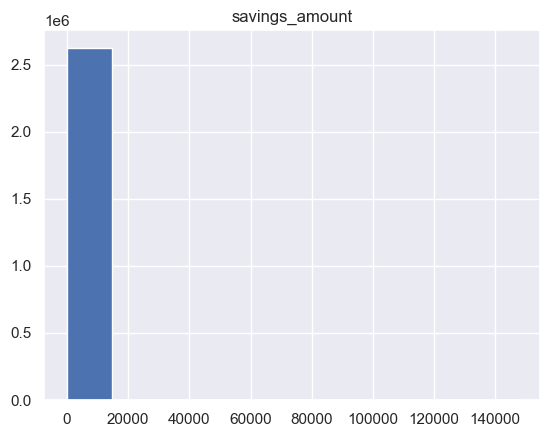

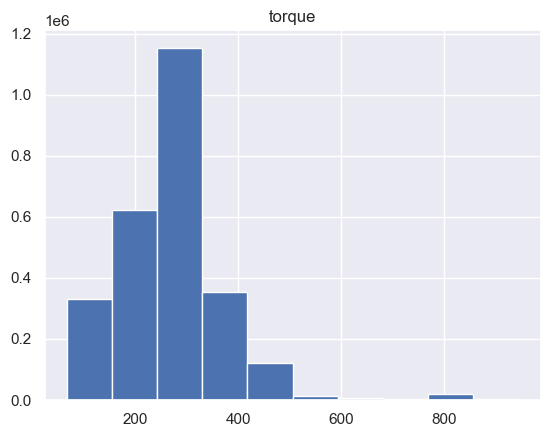

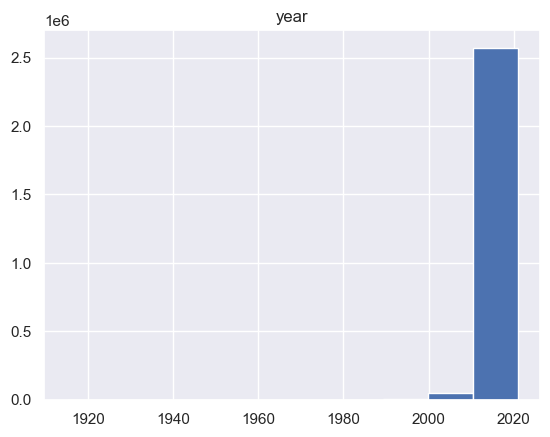

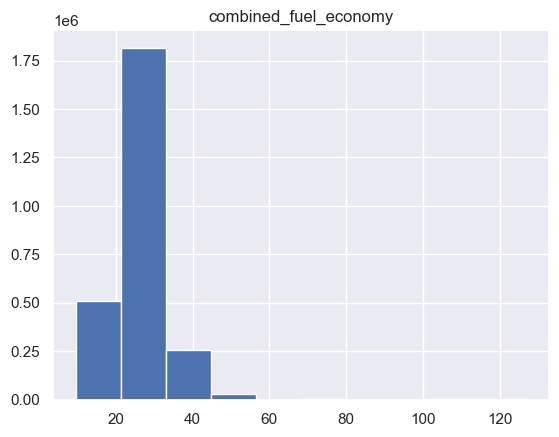

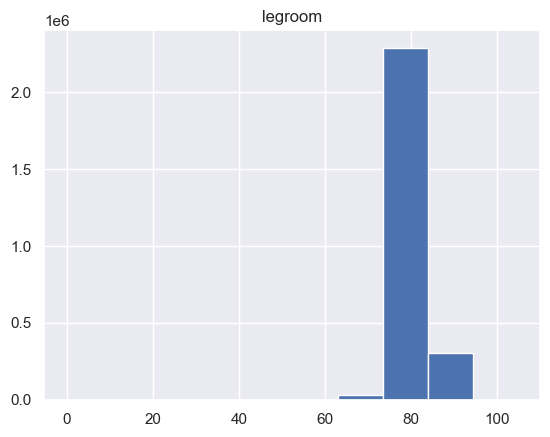

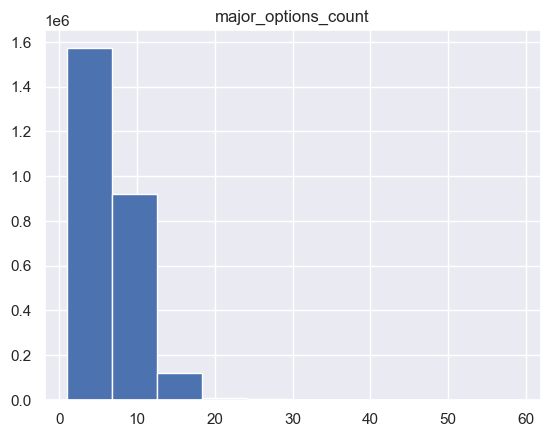

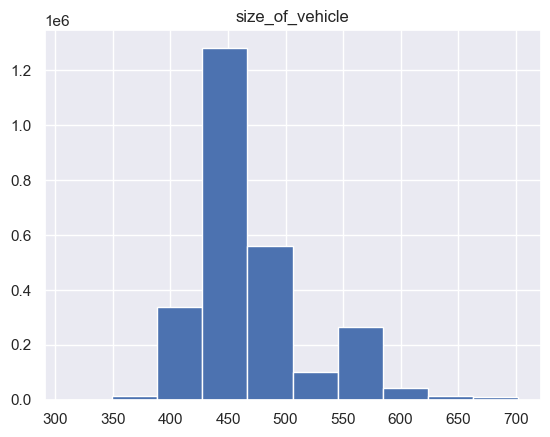

In [215]:
# Pull out the categorical variables
numerical_df = cars_df2.select_dtypes(['float', 'int64'])

# Iterate column by column
for column in numerical_df:
    
    # Do Something
    numerical_df[column].hist()
    plt.title(column)
    plt.show()

**Observations:**

1. The average listing duration is 75 days.
2. The average speed is 243 horsepower.
3. The average vehicle has 5 seats.
4. The average vehicle has 4 doors.
5. Most vehicles being sold are relatively new, with an average mileage of 20,835 miles.
6. The average price of a vehicle is $29933.37.
7. The average savings is $554.62.
8. The average torque is 260 ft-lbs.
9. The average vehicle is 4 years old, in this dataset.
10. The average fuel economy is 26.3 miles per gallon.
11. The average leg room is 80.5 inches.
12. The average wheelbase is 121.5 inches.
13. The average major options are 6 options.
14. The average size of a vehicle is 439.5 inches.
 

 


  

Let's take a look at the correlation between the numerical columns.

C:\Users\robby\AppData\Local\Temp\ipykernel_13908\1092935339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = cars_df2.corr()


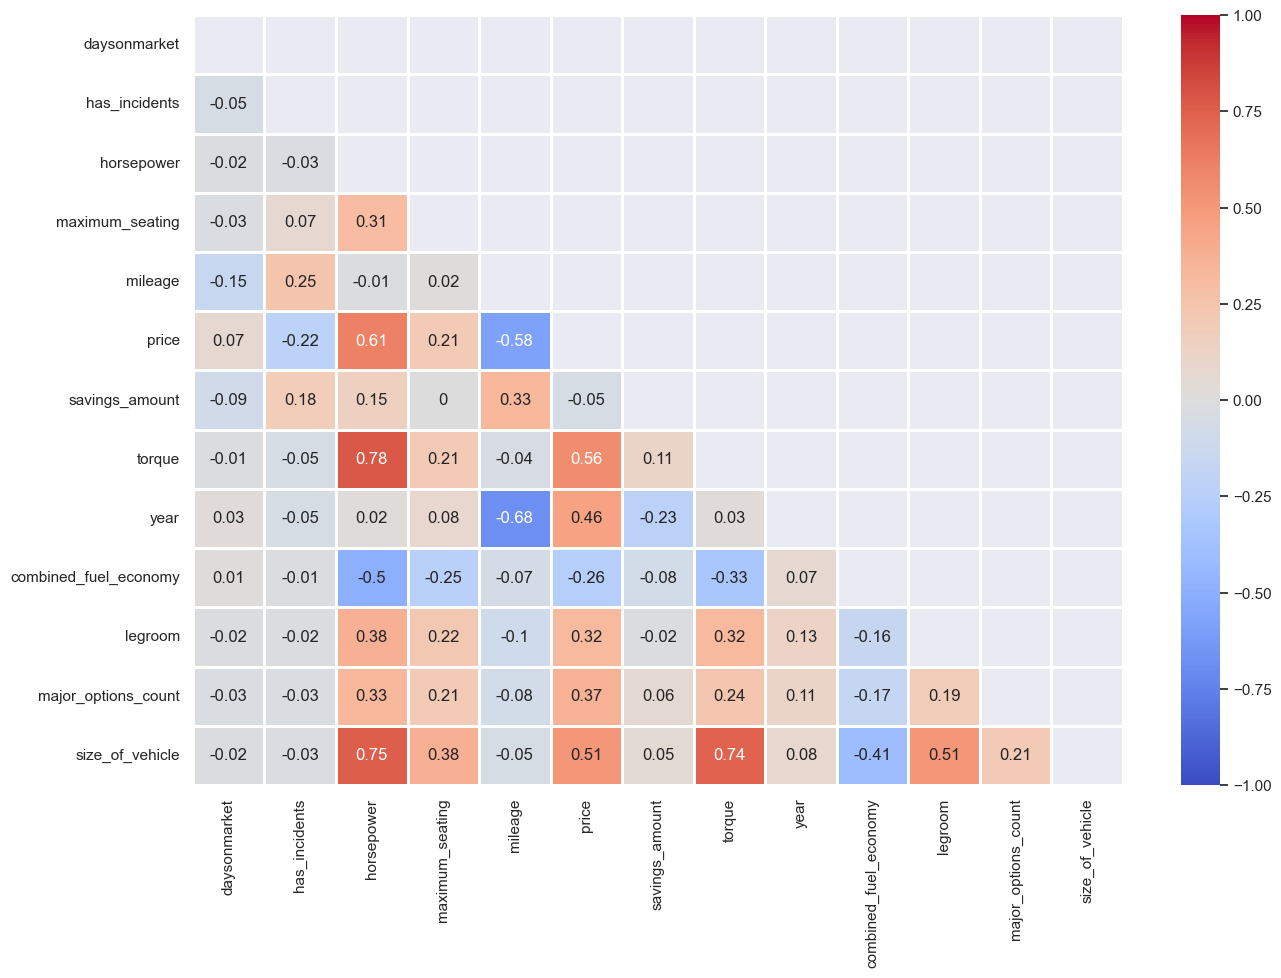

In [216]:
# instantiating the correlation matrix
corr_df = cars_df2.corr()

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(corr_df)

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, 
            center=0, cmap="coolwarm", mask=mask, linewidths=1)
plt.show()

There is no multicollinearity between the numerical columns. This means that we can use all of the numerical columns in our model.

---

## **Encoding Categorical Columns**

Now that we have explored the data, we can begin to encode the categorical columns. We will use One Hot Encoding to encode the categorical columns. This will allow us to use the categorical columns in our model.

In [217]:
cat_col = cars_df2.select_dtypes(include='object').columns

cat_col

Index(['body_type', 'engine_type', 'exterior_color', 'fuel_type',
       'interior_color', 'make_name', 'model_name', 'seller_rating',
       'transmission', 'wheel_system', 'dealer_region'],
      dtype='object')

In [218]:
# looping through the categorical columns and using get_dummies to create dummy variables
for col in cat_col:
    dummies = pd.get_dummies(cars_df2[col], prefix=col, drop_first=True)
    cars_df2 = pd.concat([cars_df2, dummies], axis=1)
    cars_df2.drop(col, axis=1, inplace=True)
     
# checking the result
cars_df2.head()

,daysonmarket,has_incidents,horsepower,maximum_seating,mileage,price,savings_amount,torque,year,combined_fuel_economy,...,transmission_CVT,transmission_Dual Clutch,transmission_M,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD,dealer_region_Northeast,dealer_region_South,dealer_region_West
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,522,False,177.000,5,7.000,10.049,0,200.000,2019,26.083,...,0,0,0,0,0,1,0,0,0,0
SALCJ2FX1LH858117,207,False,246.000,7,8.000,10.747,0,269.000,2020,26.083,...,0,0,0,0,1,0,0,0,0,0
SALRR2RV0L2433391,196,False,340.000,7,11.000,11.119,0,332.000,2020,26.083,...,0,0,0,0,1,0,0,0,0,0
SALCJ2FXXLH862327,137,False,246.000,7,7.000,10.797,0,269.000,2020,26.083,...,0,0,0,0,1,0,0,0,0,0
SALYK2EX1LA261711,242,False,247.000,5,12.000,11.111,0,269.000,2020,26.083,...,0,0,0,0,1,0,0,0,0,0


It looks like we have drastically increased the number of columns in our dataset.

Lets take a look at the correlation between the features and the target variable.

In [219]:
# checking the correlation between the price and the other variables
matrix = pd.DataFrame(cars_df2.corr()['price'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')
matrix

,price
price,1.000000
horsepower,0.611184
torque,0.560698
size_of_vehicle,0.508744
year,0.456368
major_options_count,0.366454
body_type_Pickup Truck,0.332278
engine_type_V8,0.321653
legroom,0.317011
maximum_seating,0.205582


Observations: 

* The speed of the vehicle has the highest positive correlation with the target variable. This means that the faster the vehicle, the more expensive it is.
* The size of the vehicle has a high positive correlation with the target variable. This means that the larger the vehicle, the more expensive it is.
* We can see the lowest negative correlation with mileage. This means that the more miles the vehicle has, the lower the price of the vehicle.
* What year the vehicle was made has a high positive correlation with the target variable. This means that the newer the vehicle, the more expensive it is.
* We can also see that the engine type has an effect on the price of the vehicle.
* If the vehicle has an incident, it will lower the price of the vehicle.
* Brand names has an effect on the price of the vehicle. The more popular the brand name, the more expensive the vehicle.

---

## **Dropping irrelevant features**

In order to make our model more accurate, we will drop the features that are not important to predicting the price of a vehicle. We will use the correlation matrix to determine which features are important.

Lets set our correlation threshold to 0.05 and -0.05. Meaning that we will only keep the features that have a correlation of 0.05 or higher, or -0.05 or lower. This will help us reduce the number of features in our dataset. 

The benefit of reducing the number of features is that it will make our model more accurate and easier to train. We will also be able to train our model faster. This will help us save time and money when training our model on a large dataset.

In [220]:
# making a list of the columns that have a correlation between 0.05 and -0.05 with the price column
columns_to_drop = []

for col in cars_df2.columns:
    if cars_df2[col].corr(cars_df2['price']) < 0.05 and cars_df2[col].corr(cars_df2['price']) > -0.05:
       columns_to_drop.append(col)
         
# checking the list
columns_to_drop

['body_type_Coupe',
 'body_type_Minivan',
 'body_type_Van',
 'engine_type_Electric Motor',
 'engine_type_H4',
 'engine_type_I2',
 'engine_type_I3',
 'engine_type_R2',
 'engine_type_V10',
 'engine_type_W12',
 'engine_type_W16',
 'engine_type_W8',
 'exterior_color_Black',
 'exterior_color_Blue',
 'exterior_color_Brown',
 'exterior_color_Gold',
 'exterior_color_Gray',
 'exterior_color_Green',
 'exterior_color_Mixed Colors',
 'exterior_color_Orange',
 'exterior_color_Other Color',
 'exterior_color_Red',
 'exterior_color_Yellow',
 'fuel_type_Compressed Natural Gas',
 'fuel_type_Electric',
 'fuel_type_Flex Fuel Vehicle',
 'fuel_type_Hybrid',
 'fuel_type_Propane',
 'interior_color_Black, Gray',
 'interior_color_Blue',
 'interior_color_Brown',
 'interior_color_Gold',
 'interior_color_Gray',
 'interior_color_Green',
 'interior_color_Mixed Colors',
 'interior_color_Orange',
 'interior_color_Purple',
 'interior_color_Silver',
 'interior_color_Yellow',
 'make_name_Buick',
 'make_name_Chevrolet',
 

Now lots drop the irrelevant features.

In [221]:
# dropping the columns
cars_df2.drop(columns_to_drop, axis=1, inplace=True)

# checking the result
cars_df2.shape

(2625910, 68)

Lets take a look at the new correlation matrix.

In [222]:
# checking the correlation between the price and the other variables
pd.DataFrame(cars_df2.corr()['price'].sort_values(ascending=False)).style.background_gradient(cmap='coolwarm')

,price
price,1.000000
horsepower,0.611184
torque,0.560698
size_of_vehicle,0.508744
year,0.456368
major_options_count,0.366454
body_type_Pickup Truck,0.332278
engine_type_V8,0.321653
legroom,0.317011
maximum_seating,0.205582


This looks much better. We have reduced the number of features. This will help us train our model faster and more accurately.

Next, lets check for multicollinearity. This will help us determine if there are any features that are highly correlated with each other which will cause our model to be biased.

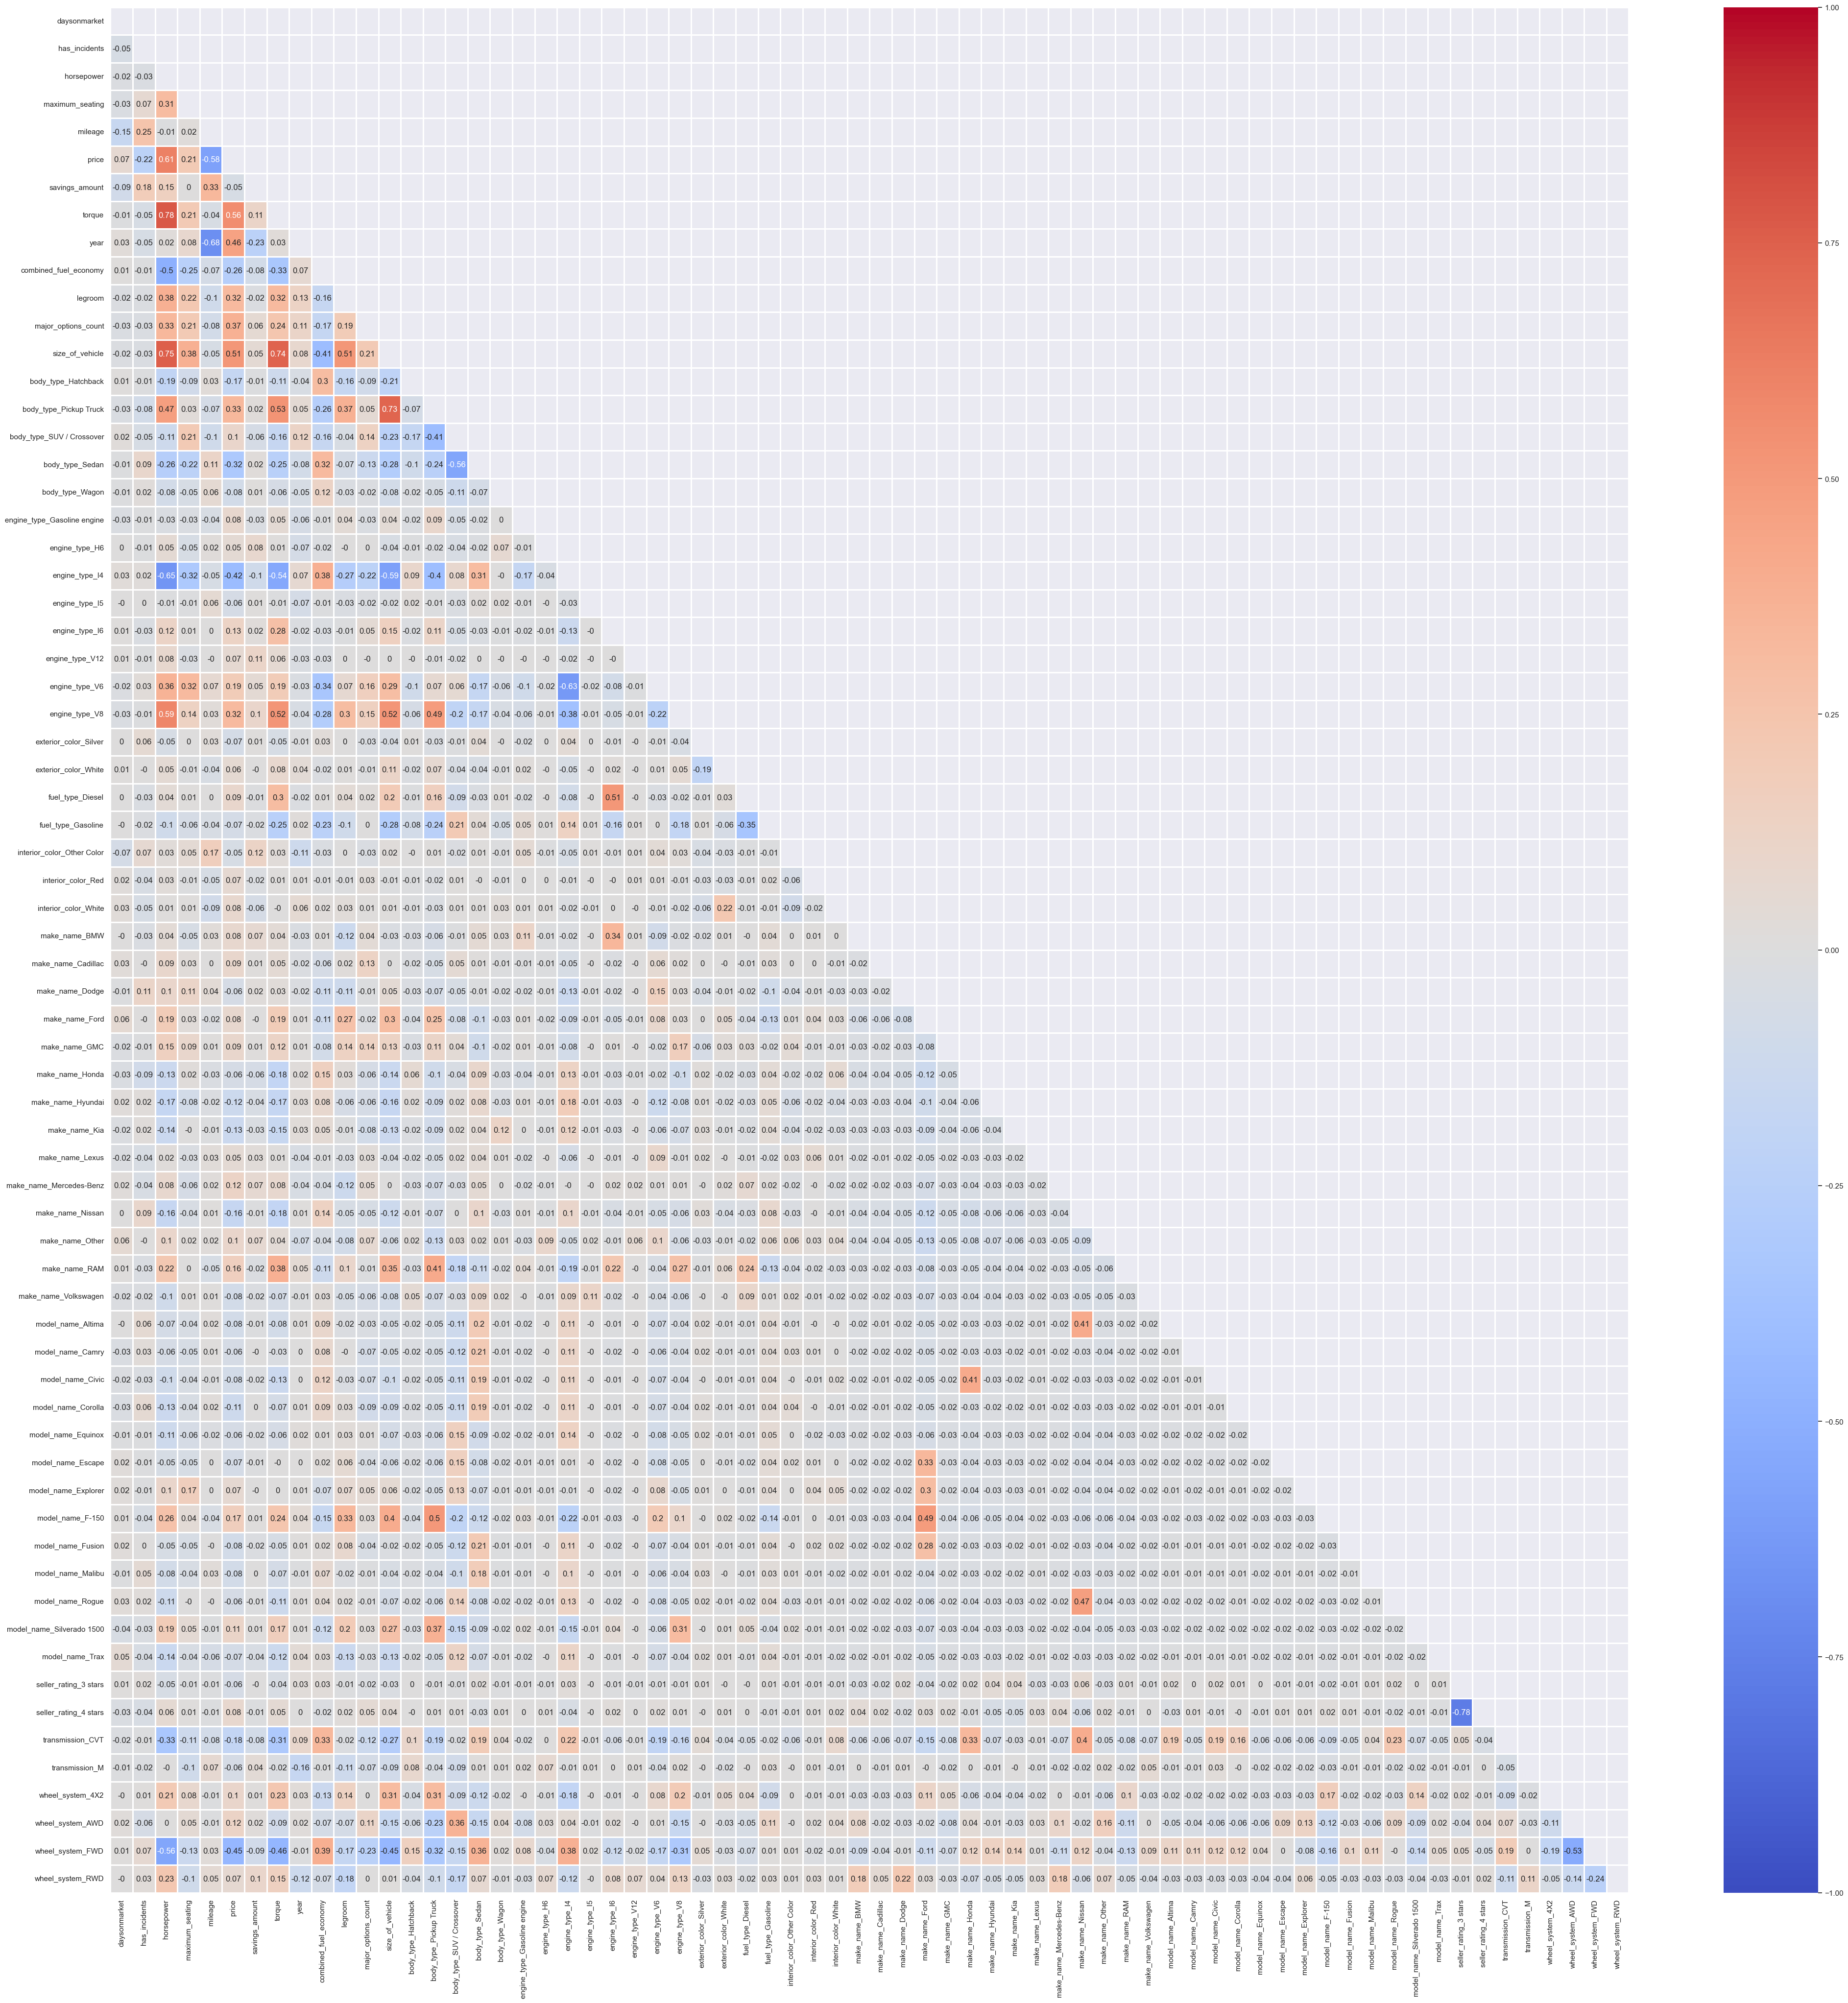

In [223]:
# instantiating the correlation matrix
corr_df = cars_df2.corr()

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(corr_df)

# Set up the matplotlib figure
plt.figure(figsize=(50, 50))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1,
            center=0, cmap="coolwarm", mask=mask, linewidths=1)
plt.show()

Looking at the correlation matrix, we can see that there are no features that are highly correlated with each other. This means that we do not have to worry about multicollinearity.

We will now save the new dataset and begin training our model on the next notebook.

In [224]:
# Exporting the dataframe to a csv file
cars_df2.to_csv("cars_cleaned.csv")

---

## **Summary**

From what we have learned from our exploratory data analysis, we can answer our questions of interest. 
 
1. Why is the price of a vehicle different from other vehicles?
 
    The price of a vehicle is different from other vehicles because of the features of the vehicle. The features of the vehicle include the year, make, model, engine type, transmission type, mileage, speed, size, and if the vehicle has an incident. These features are important to predicting the price of a vehicle because they have a high correlation with the target variable. The higher the correlation, the more important the feature is to predicting the price of a vehicle.

2. What features are important to predicting the price of a vehicle?

    The features that are important to predicting the price of a vehicle are the year, make, model, engine type, transmission type, mileage, speed, size, and if the vehicle has an incident. These features have a high correlation with the target variable. The higher the correlation, the more important the feature is to predicting the price of a vehicle.

3. What is the relationship between the price of a vehicle and other features?
 
    The relationship between the price of a vehicle and other features is that the more expensive the vehicle, the more features it has. The more features a vehicle has, the more expensive it is. The more expensive the vehicle, the more features it has. This is a positive relationship.

In our EDA, we have learned:

* The most common vehicles that are listed are SUV / Crossover, sedans, and pickup trucks.
* The most common vehicle make is Ford, Chevrolet, and Toyota.
* The average fuel economy is 19 mpg in the city, and 20-30 mpg on the highway.
* The Most common type of engine is an I4 engines, followed by V6’s and V8’s.
* The most common exterior colors are White, Black, and Silver.
* The most common interior colors are Black, Gray, and White.
* At least 11% of vehicles have been in an accident, damaged, salvaged, or had been stolen.
* The average fuel tank size is 26 gal. Not including Electric vehicles and hybrids. 
* Gas power vehicles represent 86% of the data.
* The average horsepower of a vehicle falls between 180 – 200 horsepower
* The average torque speed is 264 lb-ft.
* The average vehicle has 4-6 major options installed.
* The most common seating capacity is 5 seats, followed by 7 seats, and 6 seats.
* Majority of the vehicles on this list is new. Showing zero mileage. 
* The most common transmission is an Automatic transmission, followed by a Manual transmission.
* The top wheel systems in order are: FWD, AWD, 4WD, RWD, and 4X2.
* The average age of a vehicle is 2 years old.
* The average price of a vehicle is $29933.37.
* The most popular brand names are Ford, Chevrolet, and Toyota.

---

## **Actionable Insights**

Some actionable insights that we can take from this data are:
 
* Some of the most common vehicles that are listed are SUV / Crossover, sedans, and pickup trucks, and leading brands are Ford, Chevrolet, and Toyota. It would be wise to invest in these types of vehicles if you are looking to sell a vehicle fast.

* The size of the vehicle plays a key part in the price of the vehicle. This means that the larger the vehicle, the more expensive it is. This is likely because larger vehicles are more expensive to manufacture. If you are looking to sell a vehicle, a company should consider these factors when pricing the vehicle, or purchasing.

* There is a high importance in fuel economy and savings. It would be wise to purchase vehicles that emphases in these areas. For example, buying smaller vehicles with smaller sized engines that have great fuel economy.

* The average price of a vehicle is `$ 29,933.37`. This means that vehicles that are priced above this value will be harder to sell. So if you are looking to sell your vehicle, you should consider selling it for less than `$ 29,933.37`.

---

Given the results of our EDA, we can conclude that the models we will be using are:
 
* Linear Regression
* Ridge & Lasso 
* Decision Tree 
* Random Forest 
* XGBoost 
* Neural Network 

--- 
 
## **References**

[https://www.statisticshowto.com/identify-outliers/](https://www.statisticshowto.com/identify-outliers/)


In [225]:
import session_info
session_info.show()